# Necessary Libraries

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
   
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

# Read the dataset

In [25]:
df =pd.read_csv("C:\\Users\\amrit\\Downloads\\Loan Flag new.csv")

# display the first five observations
df.head()

Id            Income  Age  Experience Married/Single House_Ownership  \
0   17   ? 73,15,840.00    71           8        married          rented   
1   35   ? 90,86,933.00    55           7         single          rented   
2   68   ? 95,76,258.00    79          18         single          rented   
3   72   ? 32,08,322.00    55          18         single          rented   
4  145   ? 39,70,273.00    53          14         single          rented   

  Car_Ownership Dependents              Profession        CITY  \
0            no        Nan  Air_traffic_controller   Kamarhati   
1            no          4  Air_traffic_controller  Saharanpur   
2           yes        NaN  Air_traffic_controller  Jamshedpur   
3            no          4  Air_traffic_controller    Kottayam   
4            no        NaN  Air_traffic_controller       Satna   

            STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
0     West_Bengal                8                 14          0  
1   Uttar_Pradesh                7                 13          0  
2       Jharkhand                6                 11          0  
3          Kerala                8                 12          0  
4  Madhya_Pradesh                4                 12          0

# Data Preprocessing

###  Basic Info

In [ ]:
# basic information

In [27]:
df.shape

(252000, 14)

In [ ]:
# data types

In [29]:
df.dtypes

Id                    int64
Income               object
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Dependents           object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [ ]:
# here we can see that datatype of income is object and it should be of float type

In [31]:
df['Income'].head()

0     ? 73,15,840.00 
1     ? 90,86,933.00 
2     ? 95,76,258.00 
3     ? 32,08,322.00 
4     ? 39,70,273.00 
Name: Income, dtype: object

In [ ]:
# removing impuriries from income

In [33]:
df['Income']=df['Income'].str.replace('?','')
df['Income']=df['Income'].str.replace(' ','')
df['Income']=df['Income'].str.replace(',','')

In [34]:
df['Income'].head()

0    7315840.00
1    9086933.00
2    9576258.00
3    3208322.00
4    3970273.00
Name: Income, dtype: object

In [ ]:
# change the datatype to float

In [37]:
df['Income']=df['Income'].astype(float)

In [39]:
df['Income'].dtype

dtype('float64')

### Remove Insignificant variable

In [1810]:
# here we can see , since id is not necessary for numerical computation ,we consider to drop it  

In [41]:
df=df.drop(['Id'],axis=1)

In [ ]:
df.describe()

Duplicate Values

In [43]:
df[df.index.duplicated()]

Empty DataFrame
Columns: [Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Dependents, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []

In [1819]:
#  duplicates values are not detected

### Null values

In [48]:
null_value=df.isnull().sum()

In [50]:
percentage =null_value/len(df)*100

In [52]:
null_df=pd.concat([null_value,percentage], axis=1,keys=['null_value','percentage'])
null_df

null_value  percentage
Income                      0    0.000000
Age                         0    0.000000
Experience                  0    0.000000
Married/Single              0    0.000000
House_Ownership             0    0.000000
Car_Ownership               0    0.000000
Dependents             251150   99.662698
Profession                  0    0.000000
CITY                        0    0.000000
STATE                       0    0.000000
CURRENT_JOB_YRS             0    0.000000
CURRENT_HOUSE_YRS           0    0.000000
Risk_Flag                   0    0.000000

In [1828]:
# only dependents column has 99% duplicate values , so we choose to drop it

In [54]:
df.drop('Dependents',inplace= True,axis=1)

### Processing of Categorical variables

In [56]:
df_cat=df.select_dtypes(include=object) 

In [58]:
for i in df_cat.columns:
    val_count=df[i].value_counts()
    print(val_count,'\n')

Married/Single
single     226233
married     25615
M             113
S              39
Name: count, dtype: int64 

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64 

Car_Ownership
no     175937
yes     75979
No         63
Y          16
YES         5
Name: count, dtype: int64 

Profession
Surgeon                       14745
Engineer                      10317
Chemical_engineer             10246
Computer_operator              9851
Technician                     9492
Designer                       9356
Lawyer                         9206
Analyst                        8644
Physician                      6977
Economist                      6696
Design_Engineer                6622
Computer_hardware_engineer     6302
Statistician                   5806
Biomedical_Engineer            5671
Industrial_Engineer            5440
Psychologist                   5390
Magistrate                     5357
Fashion_Designer               5304
C

In [1837]:
# removing impurities from categorical variables

In [1839]:
df['Married/Single'].replace(['M','S'],['married','single'],inplace=True)

In [1841]:
df['Car_Ownership'].replace(['No','Y','YES'],['no','yes','yes'],inplace=True)

In [1843]:
df['STATE'].replace(['Uttar_Pradesh[5]'],['Uttar_Pradesh'],inplace=True)

In [1845]:
for i in df_cat.columns:
    val_count=df[i].value_counts()
    print(val_count,'\n')

Married/Single
single     226272
married     25728
Name: count, dtype: int64 

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64 

Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64 

Profession
Surgeon                       14745
Engineer                      10317
Chemical_engineer             10246
Computer_operator              9851
Technician                     9492
Designer                       9356
Lawyer                         9206
Analyst                        8644
Physician                      6977
Economist                      6696
Design_Engineer                6622
Computer_hardware_engineer     6302
Statistician                   5806
Biomedical_Engineer            5671
Industrial_Engineer            5440
Psychologist                   5390
Magistrate                     5357
Fashion_Designer               5304
Consultant                     5221
Mechanical_engineer            5217
Hotel_M

In [1847]:
df.head()

Income  Age  Experience Married/Single House_Ownership  \
0 7315840.000000   71           8        married          rented   
1 9086933.000000   55           7         single          rented   
2 9576258.000000   79          18         single          rented   
3 3208322.000000   55          18         single          rented   
4 3970273.000000   53          14         single          rented   

  Car_Ownership              Profession        CITY           STATE  \
0            no  Air_traffic_controller   Kamarhati     West_Bengal   
1            no  Air_traffic_controller  Saharanpur   Uttar_Pradesh   
2           yes  Air_traffic_controller  Jamshedpur       Jharkhand   
3            no  Air_traffic_controller    Kottayam          Kerala   
4            no  Air_traffic_controller       Satna  Madhya_Pradesh   

   CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
0                8                 14          0  
1                7                 13          0  
2                6                 11          0  
3                8                 12          0  
4                4                 12          0

### Outliers Treatment

In [1850]:
df_num=df.select_dtypes('number')
df_num.head()

Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0 7315840.000000   71           8                8                 14   
1 9086933.000000   55           7                7                 13   
2 9576258.000000   79          18                6                 11   
3 3208322.000000   55          18                8                 12   
4 3970273.000000   53          14                4                 12   

   Risk_Flag  
0          0  
1          0  
2          0  
3          0  
4          0

In [1852]:
df_num=df_num.drop(['Risk_Flag'],axis=1)

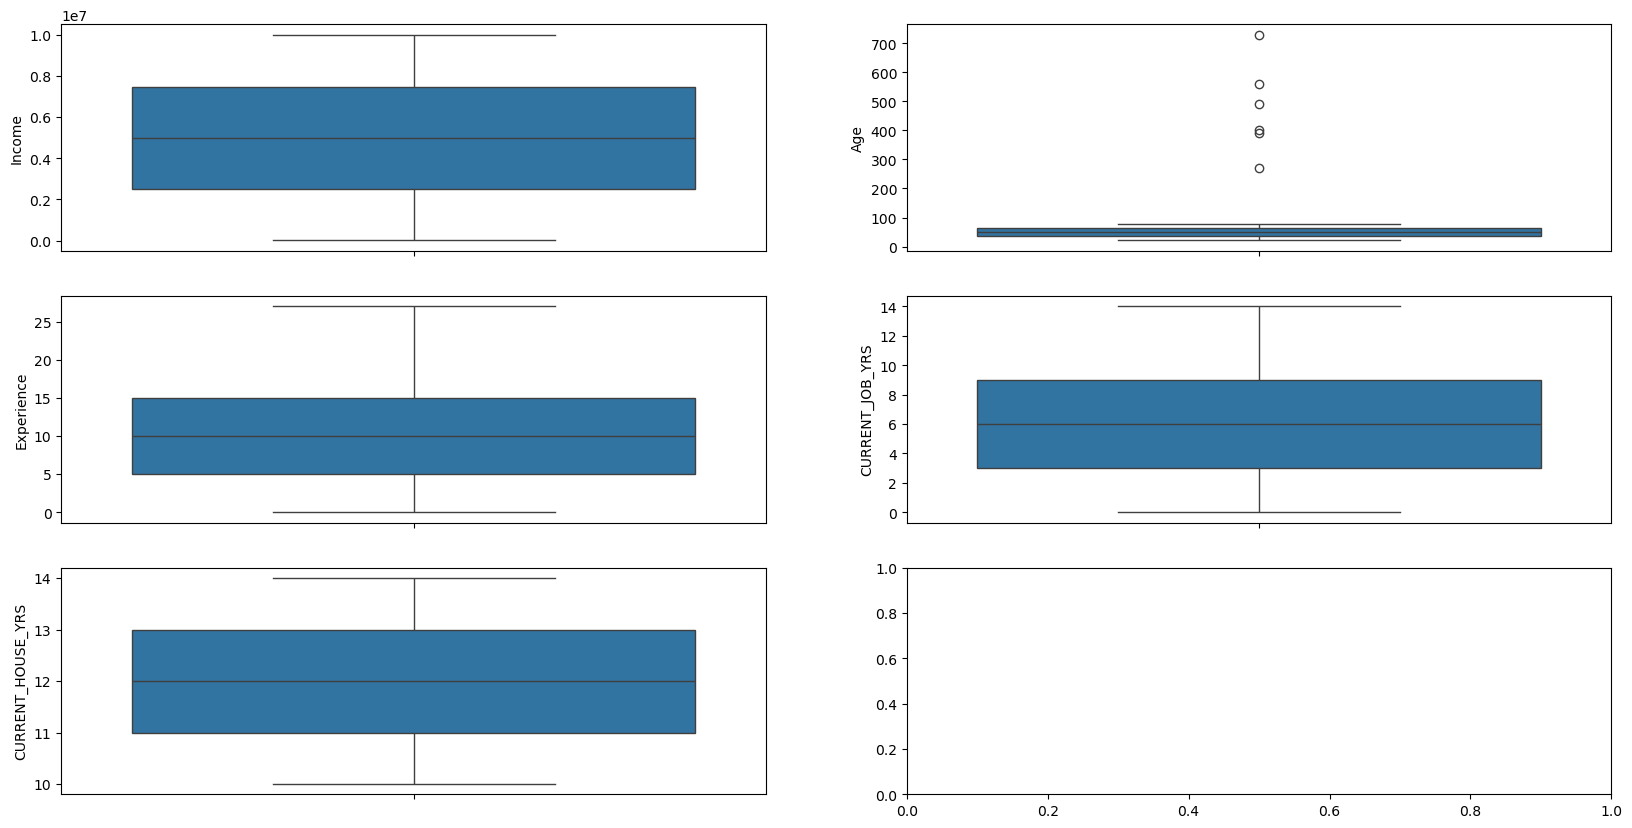

In [1854]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(20, 10))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    

    sns.boxplot(df_num[variable], ax = subplot)

# display the plot
plt.show()

In [1855]:
# here we can see few outliers in age column in upper quantile , we can remove them using iqr

In [1856]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
UB=Q3 + (1*IQR)

In [1857]:
df=df[~(df['Age']>UB)]

In [1858]:
df.shape

(251994, 12)

In [1859]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [1862]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data
    df_cleaned = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    return df_cleaned

# Apply to numerical columns
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns
df_cleaned = remove_outliers_iqr(df_cleaned, numerical_cols)

print("Outliers removed using IQR method. New shape:", df_cleaned.shape)


Outliers removed using IQR method. New shape: (220999, 12)


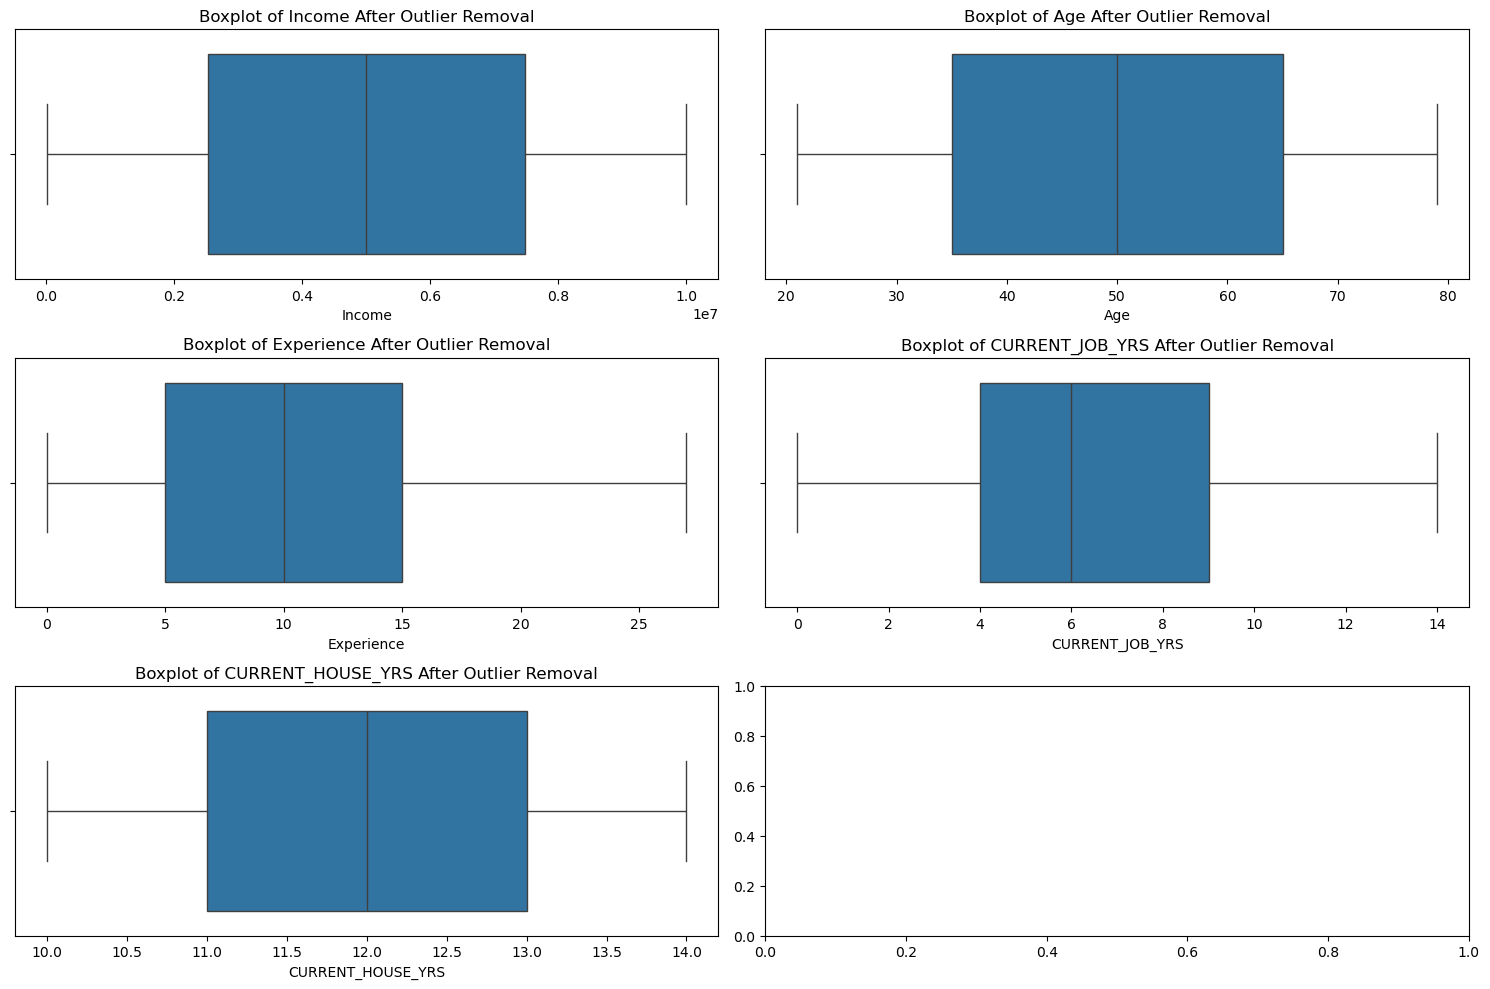

In [1868]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # Adjust the number of subplots

for i, col in enumerate(num_cols):
    sns.boxplot(x=df_cleaned[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Boxplot of {col} After Outlier Removal")

plt.tight_layout()
plt.show()


### Visualization

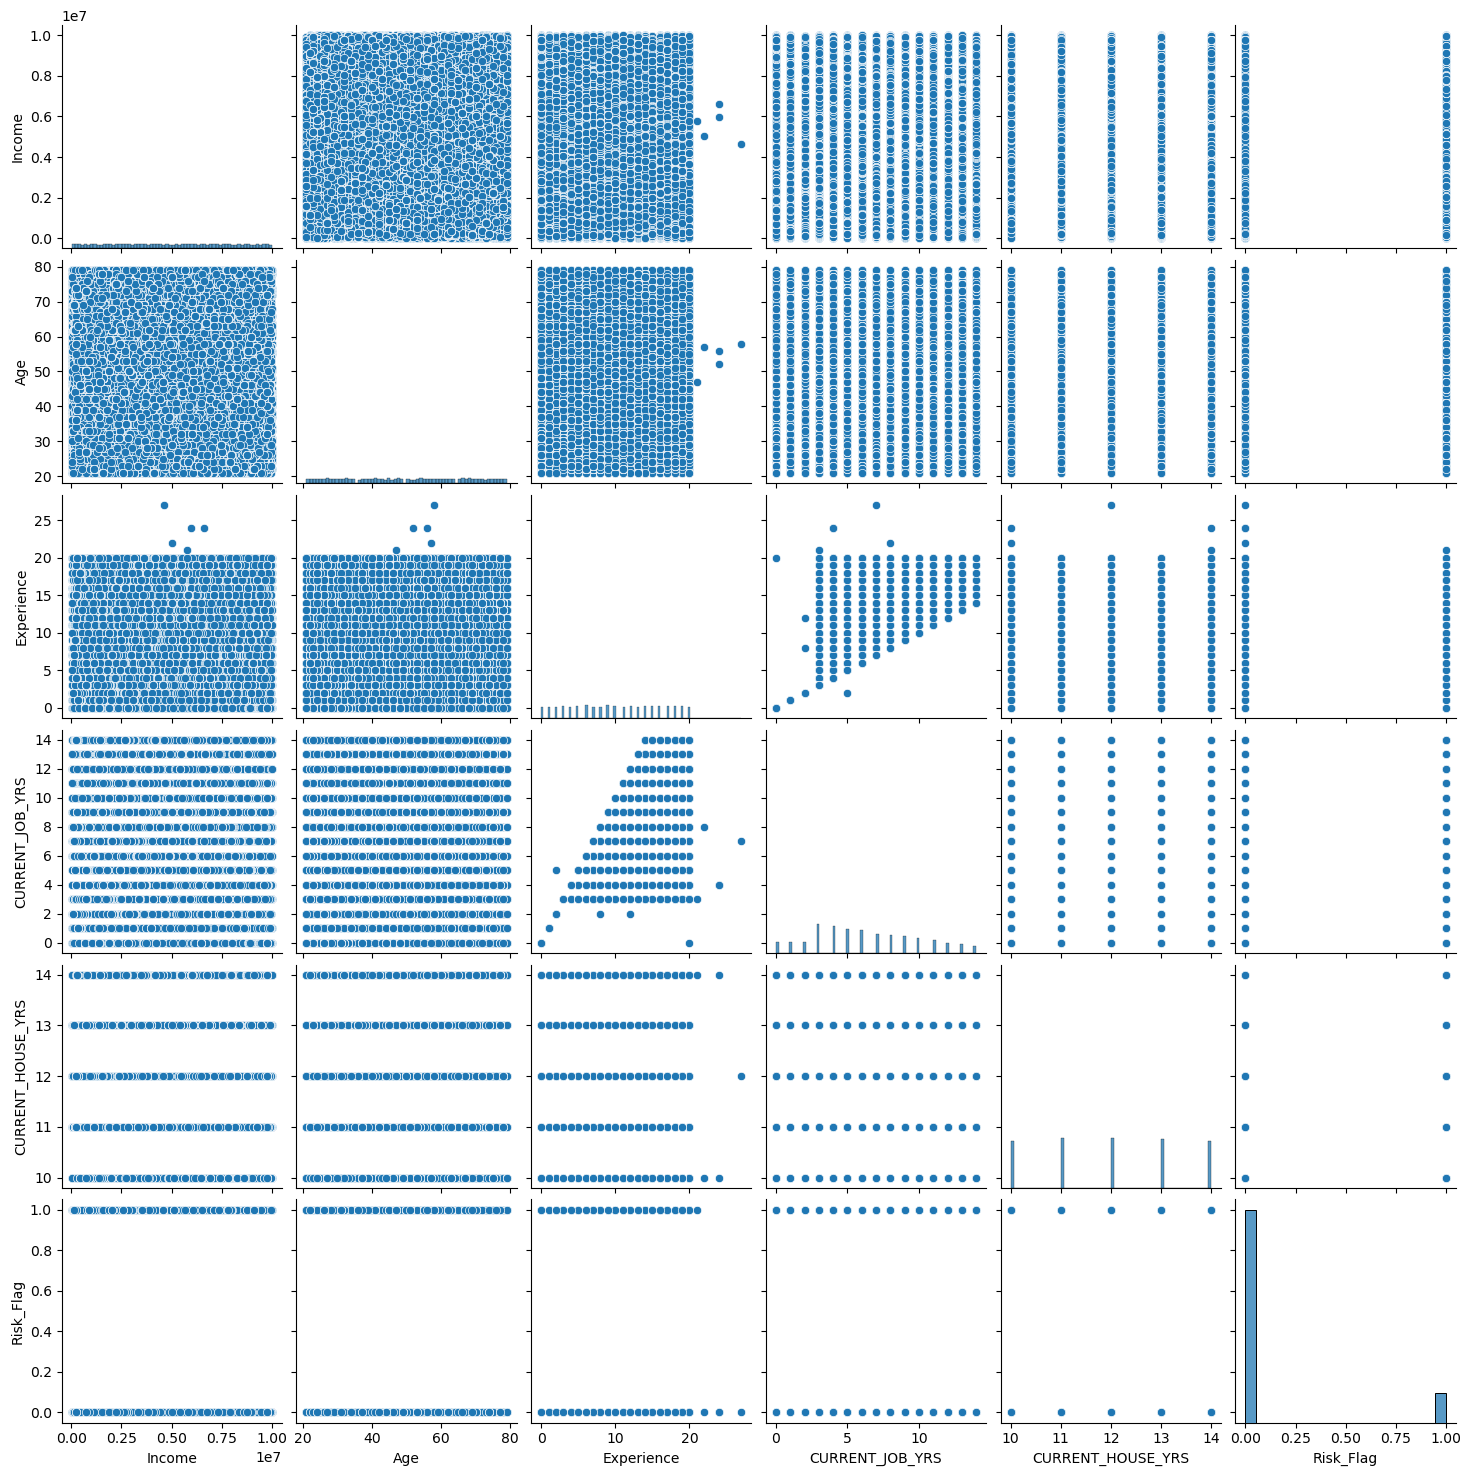

In [1870]:
import seaborn as sns
import matplotlib.pyplot as plt

df_viz = df_cleaned  # Assign cleaned data to df_viz
sns.pairplot(df)
plt.show()  


In [1872]:
#Below plots will illustarte the variation of categorical features with respect to target variable which is ‘risk flag’.

<Axes: ylabel='Married/Single'>

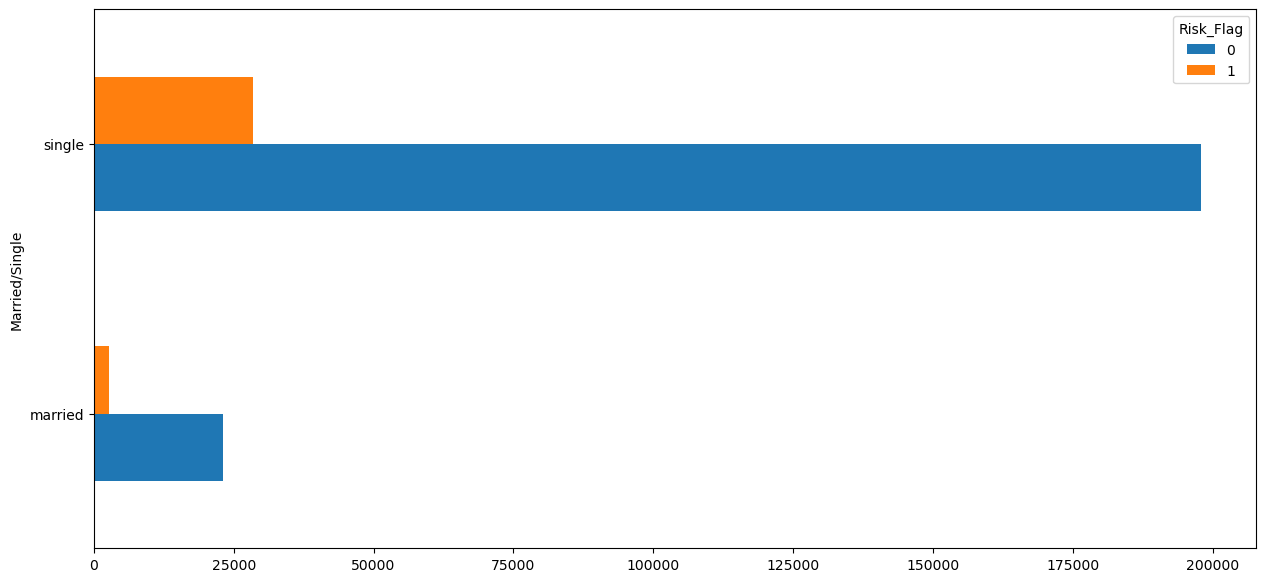

In [1873]:

pd.crosstab(index=df['Married/Single'],columns=df['Risk_Flag'],values=df['Married/Single'],aggfunc='count').plot.barh(figsize=(15,7))

<Axes: ylabel='House_Ownership'>

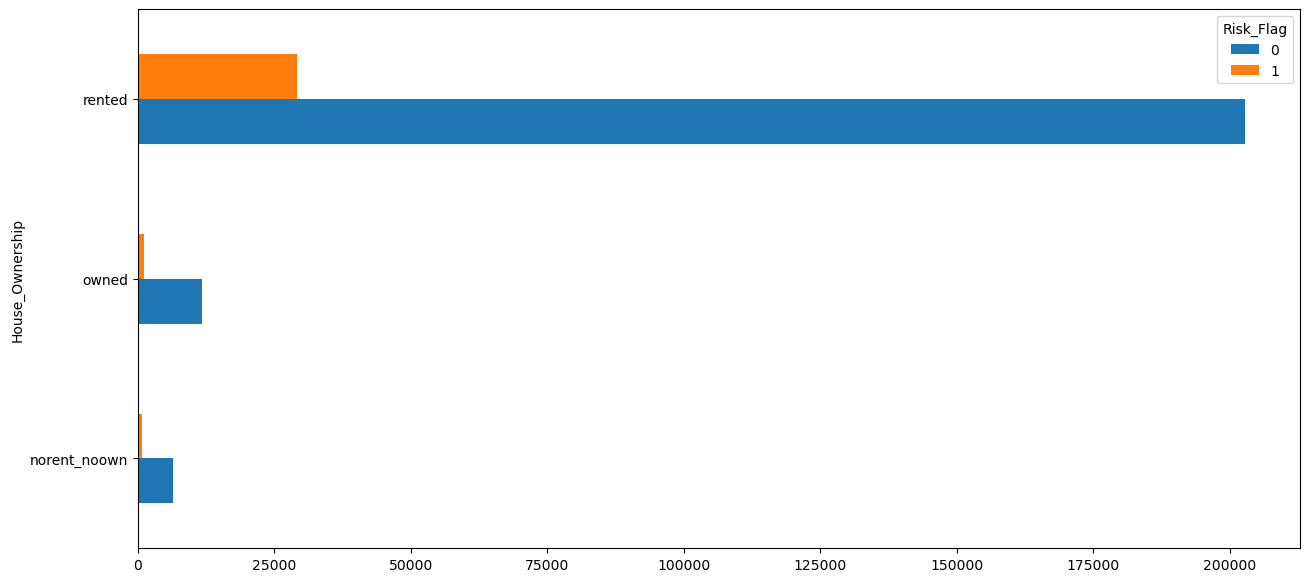

In [1874]:
pd.crosstab(index=df['House_Ownership'],columns=df['Risk_Flag'],values=df['House_Ownership'],aggfunc='count').plot.barh(figsize=(15,7))

<Axes: ylabel='Car_Ownership'>

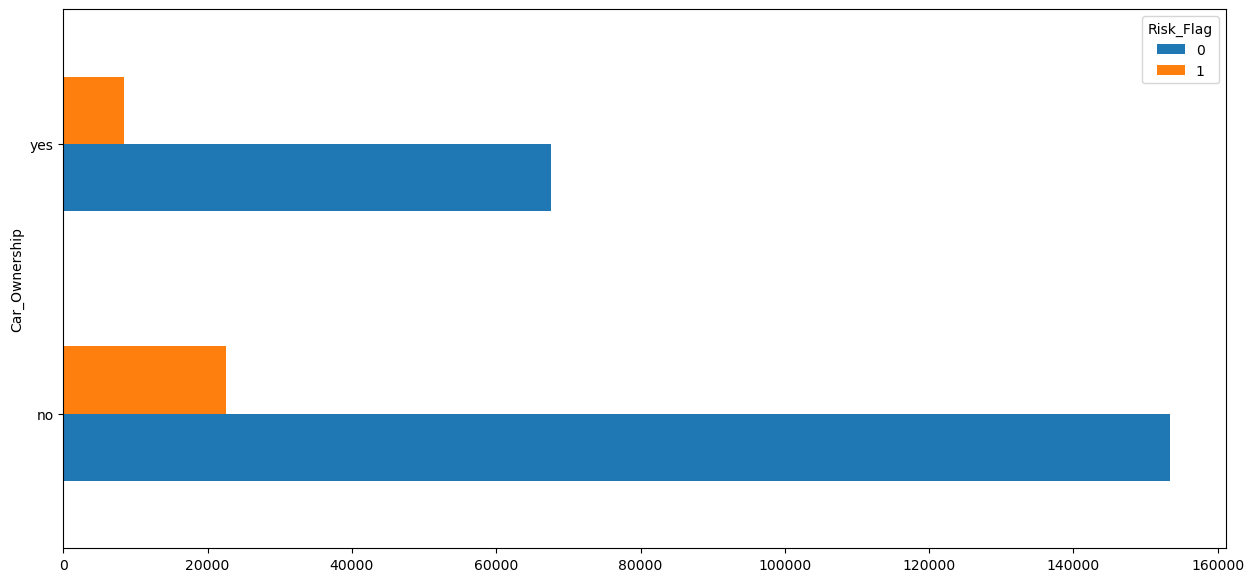

In [1875]:
pd.crosstab(index=df['Car_Ownership'],columns=df['Risk_Flag'],values=df['Car_Ownership'],aggfunc='count').plot.barh(figsize=(15,7))

In [1876]:
### alternate

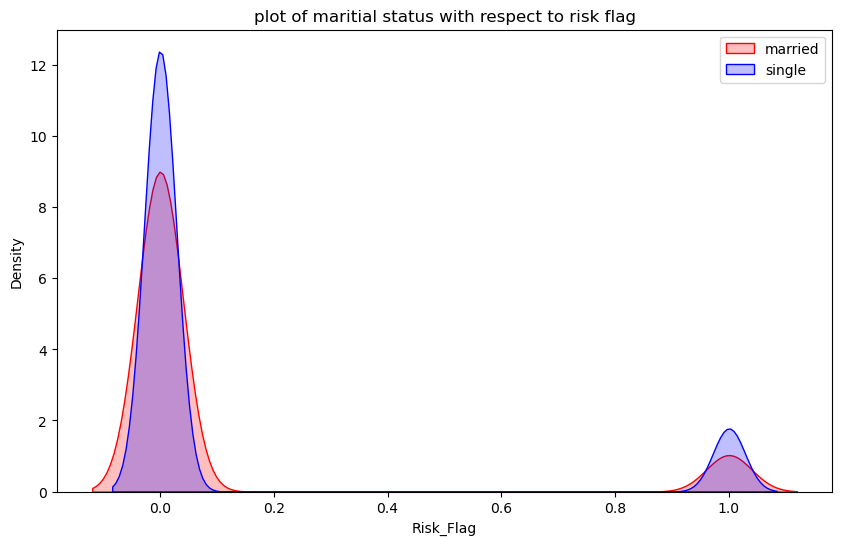

In [1877]:
plt.figure(figsize=(10,6))
ax=sns.kdeplot(df.Risk_Flag[(df['Married/Single']=='married')],color='Red',shade=True)
ax=sns.kdeplot(df.Risk_Flag[(df['Married/Single']=='single')],ax=ax,color='Blue',shade=True)
ax.legend(['married','single'])
plt.title('plot of maritial status with respect to risk flag')
plt.show()

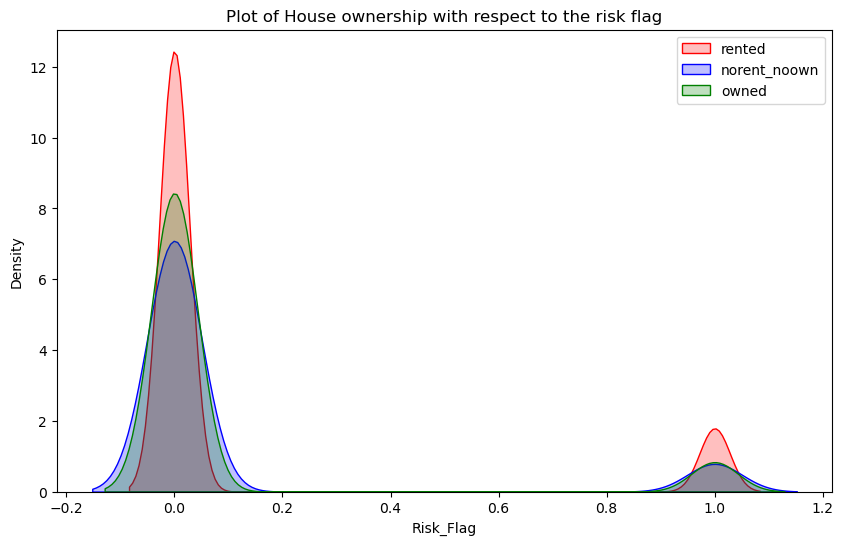

In [1878]:
plt.figure(figsize=(10,6))
ax=sns.kdeplot(df.Risk_Flag[(df['House_Ownership']=='rented')],color='Red',shade=True)
ax=sns.kdeplot(df.Risk_Flag[(df['House_Ownership']=='norent_noown')],ax=ax,color='Blue',shade=True)
ax=sns.kdeplot(df.Risk_Flag[(df['House_Ownership']=='owned')],ax=ax,color='Green',shade=True)
ax.legend(['rented','norent_noown','owned'])
plt.title('Plot of House ownership with respect to the risk flag')
plt.show()

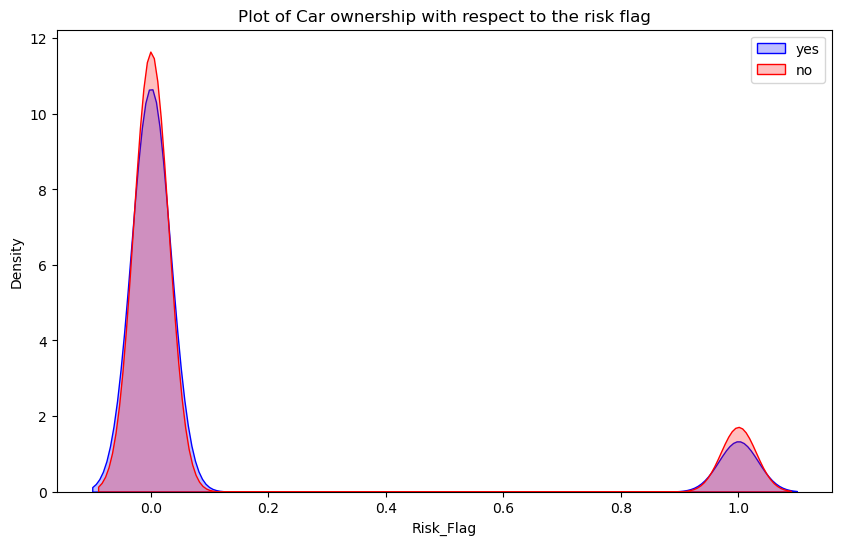

In [1879]:
plt.figure(figsize=(10,6))
ax=sns.kdeplot(df.Risk_Flag[(df['Car_Ownership']=='yes')],color='Blue',shade=True)
ax=sns.kdeplot(df.Risk_Flag[(df['Car_Ownership']=='no')],ax=ax,color='Red',shade=True)
ax.legend(['yes','no'])
plt.title('Plot of Car ownership with respect to the risk flag')
plt.show()

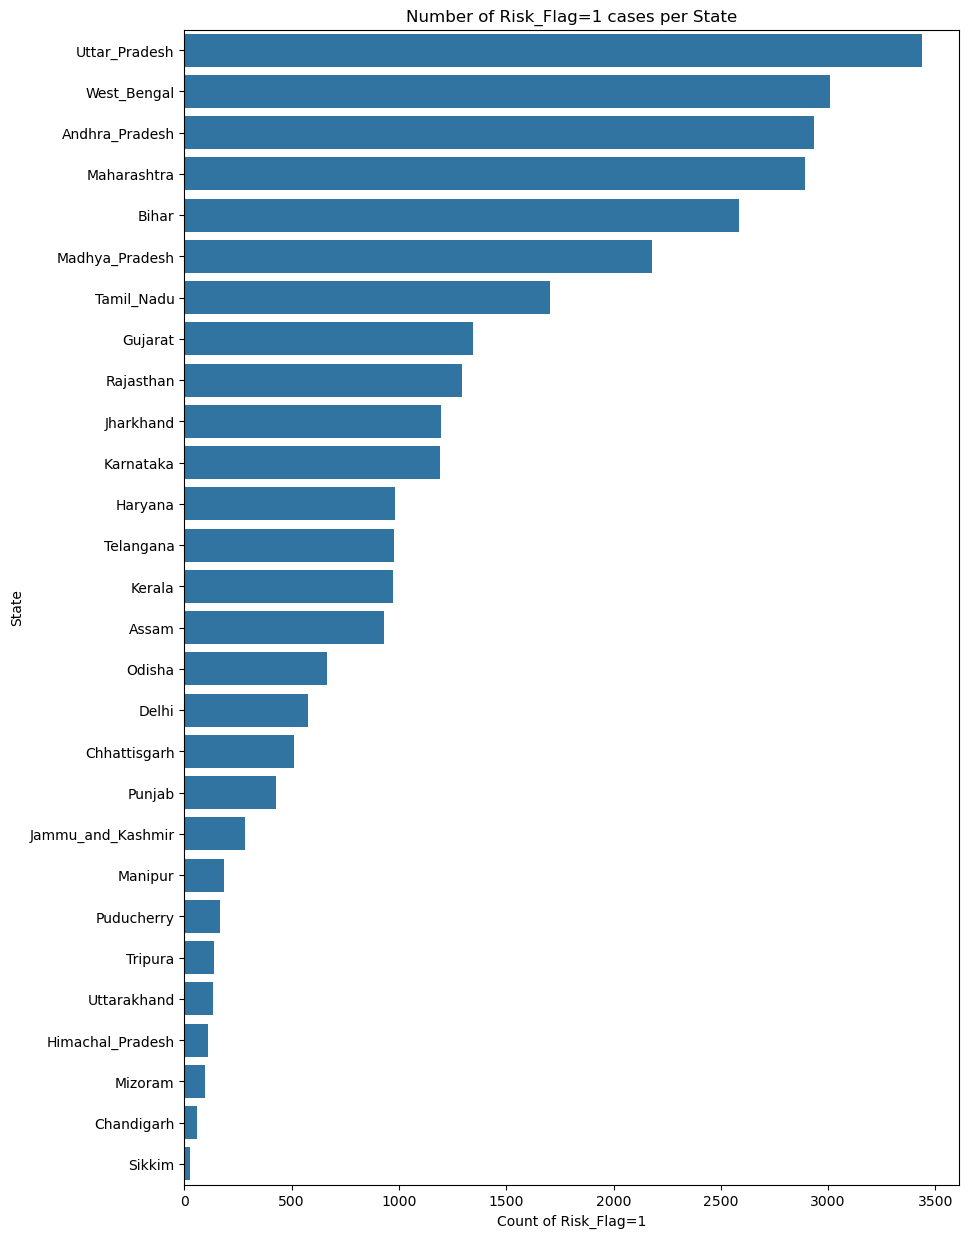

In [1880]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 15))

# Count occurrences of Risk_Flag=1 for each state
df_risk = df[df['Risk_Flag'] == 1]['STATE'].value_counts().reset_index()
df_risk.columns = ['STATE', 'Count']

# Horizontal bar plot
sns.barplot(x='Count', y='STATE', data=df_risk)

plt.xlabel("Count of Risk_Flag=1")
plt.ylabel("State")
plt.title("Number of Risk_Flag=1 cases per State")

plt.show()


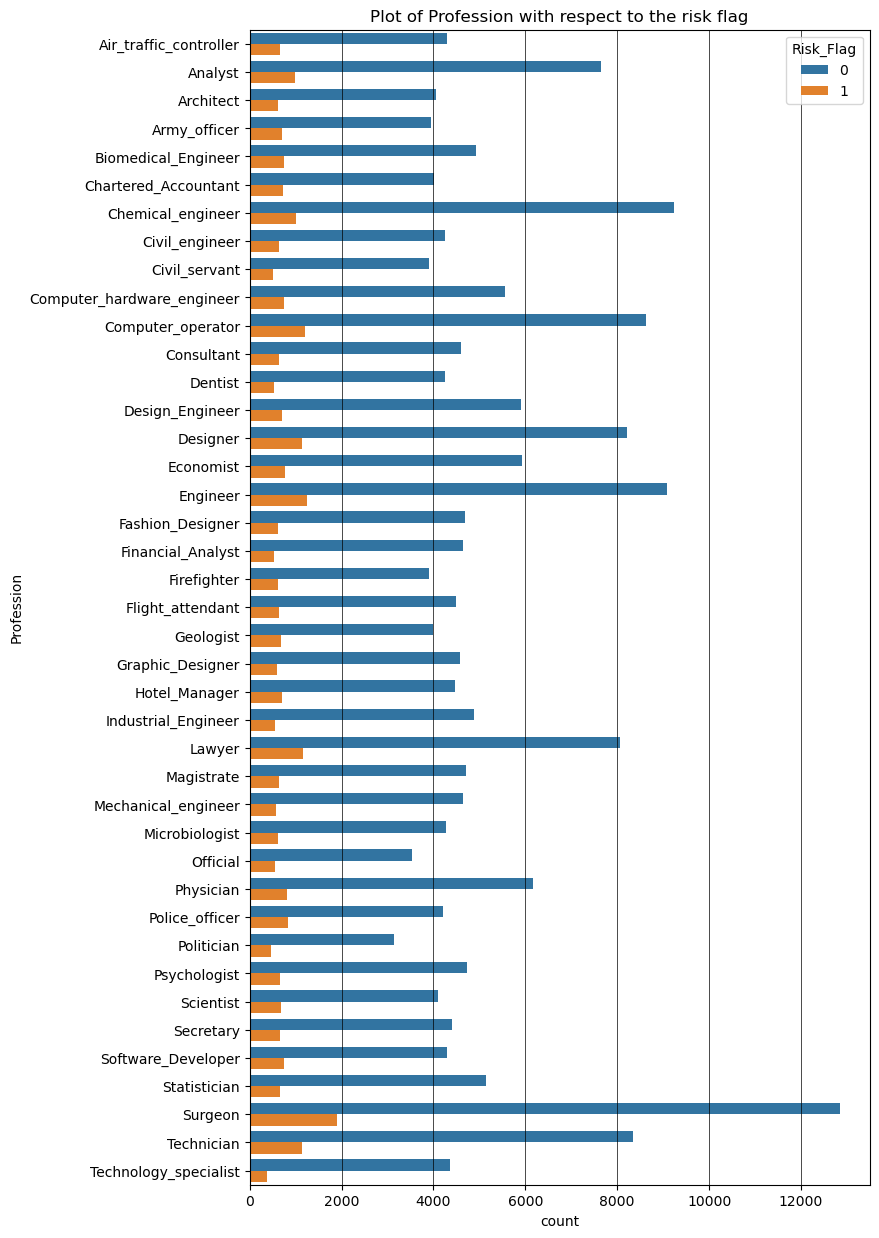

In [1881]:
plt.figure(figsize=(8,15))
plt.grid('dark', color='black', ls = '-', lw = 0.5)
sns.countplot(y='Profession',data=df,hue='Risk_Flag',orient='h')
plt.title('Plot of Profession with respect to the risk flag')
plt.show()

In [1882]:
# plots for numerical variable vs target variable

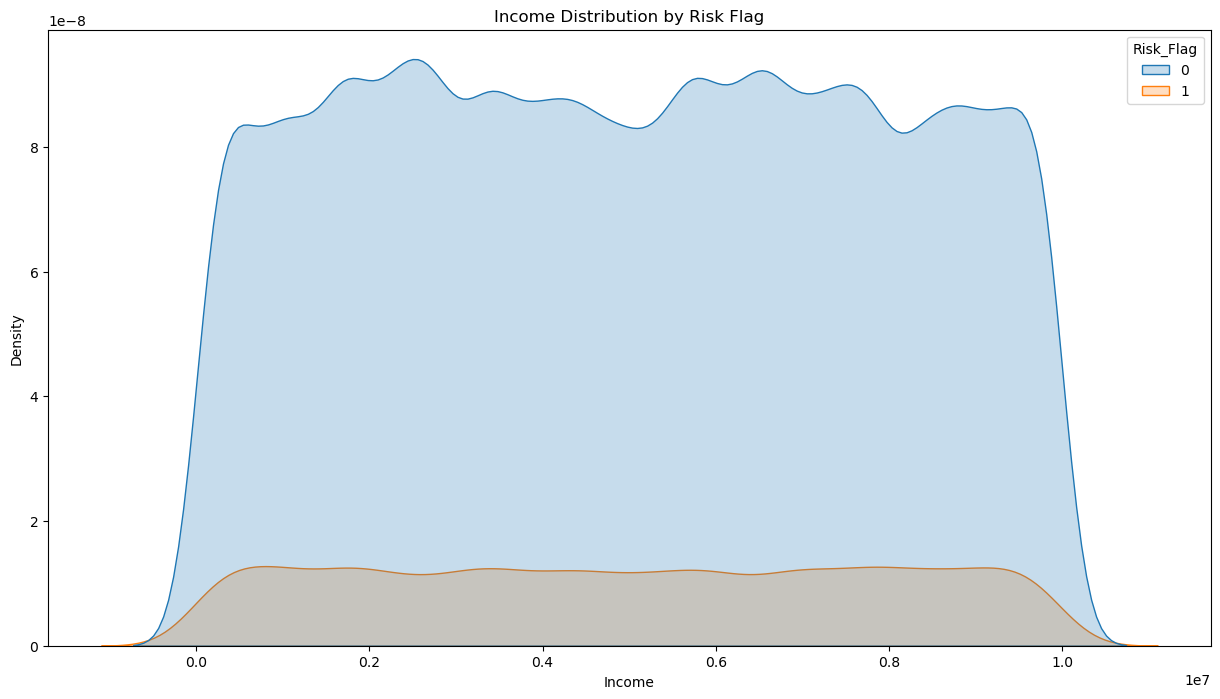

In [1883]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=df, x="Income", hue="Risk_Flag", fill=True)  # Use 'fill=True' for better visualization
plt.title("Income Distribution by Risk Flag")
plt.show()


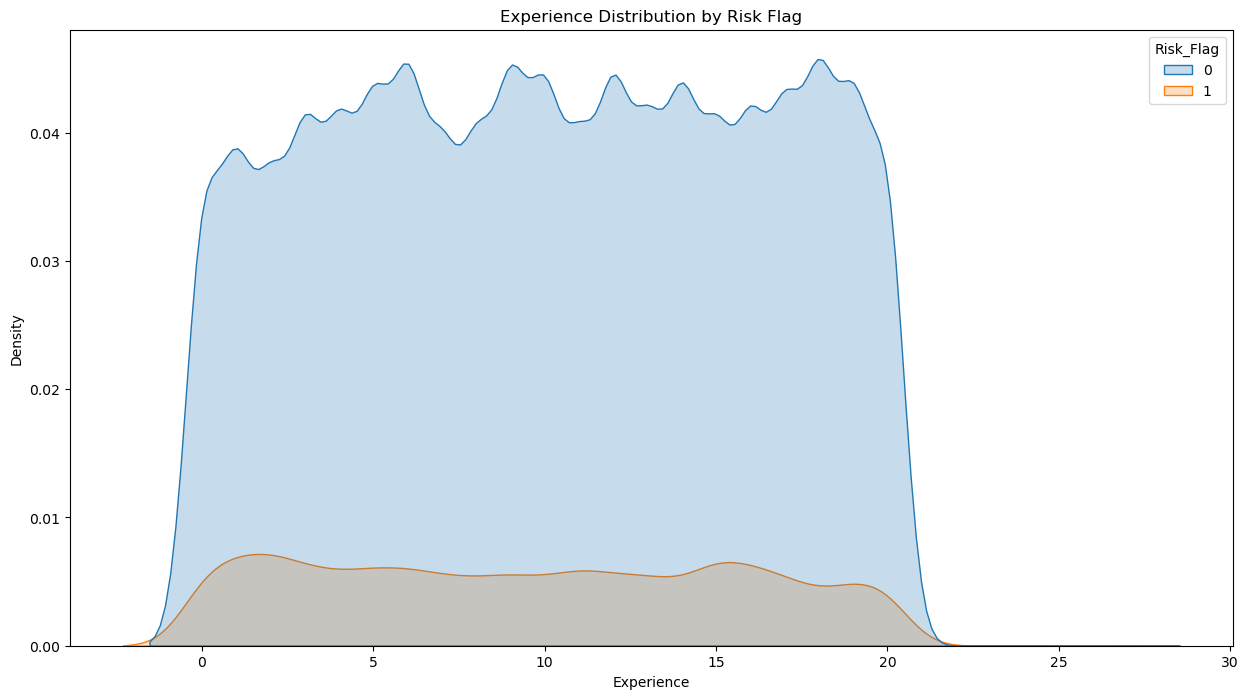

In [1884]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=df, x="Experience", hue="Risk_Flag", fill=True)  # 'fill=True' adds color shading
plt.title("Experience Distribution by Risk Flag")
plt.show()


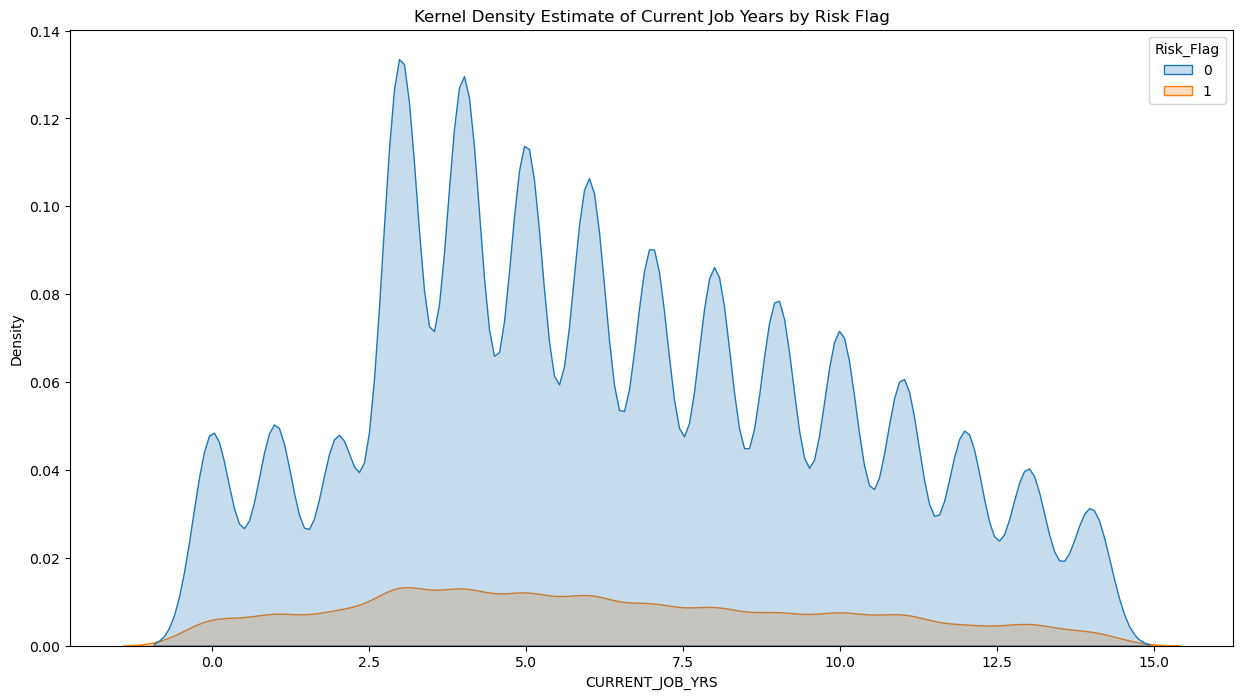

In [1885]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=df, x="CURRENT_JOB_YRS", hue="Risk_Flag", fill=True)  # 'fill=True' for better visibility
plt.title("Kernel Density Estimate of Current Job Years by Risk Flag")
plt.show()


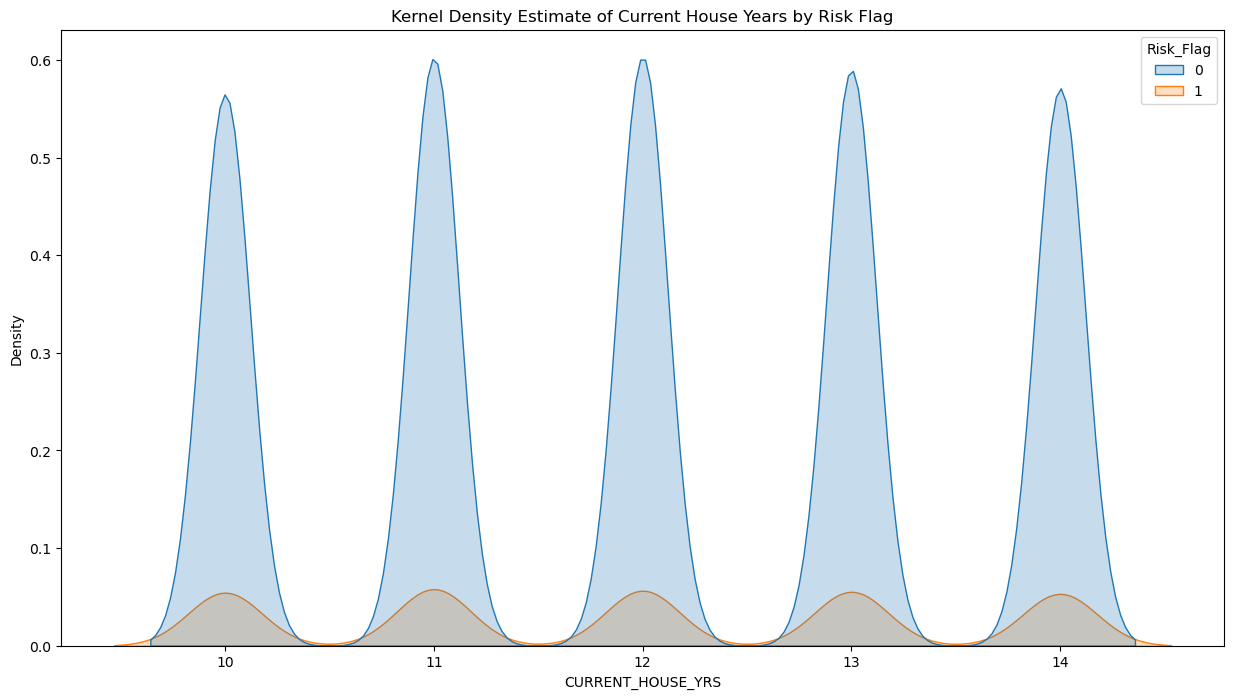

In [1886]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=df, x="CURRENT_HOUSE_YRS", hue="Risk_Flag", fill=True)  # 'fill=True' for better visibility
plt.title("Kernel Density Estimate of Current House Years by Risk Flag")
plt.show()


In [1887]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Compute skewness
df.skew()


Income               0.005995
Age                 -0.005329
Experience          -0.012678
Married/Single      -2.628371
House_Ownership     -3.791402
Car_Ownership        0.864632
Profession           0.066897
CITY                 0.006252
STATE               -0.037451
CURRENT_JOB_YRS      0.273175
CURRENT_HOUSE_YRS    0.006790
Risk_Flag            2.295749
dtype: float64

### Feature Engineeing

In [1889]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1
iqr

4974487.0

In [1890]:
inc = df['Income']

# define a function to create new levels
# use 'if' statement to pass the conditions
def new_feat(inc):

    if (inc <= q1) & (inc > 0):
        return 'low'
    if (inc >= q1) & (inc < q3):
        return 'medium'
    if (inc > q3):
        return 'high'
    
# apply the function to create a new column
df['Income_level']= df['Income'].apply(new_feat)

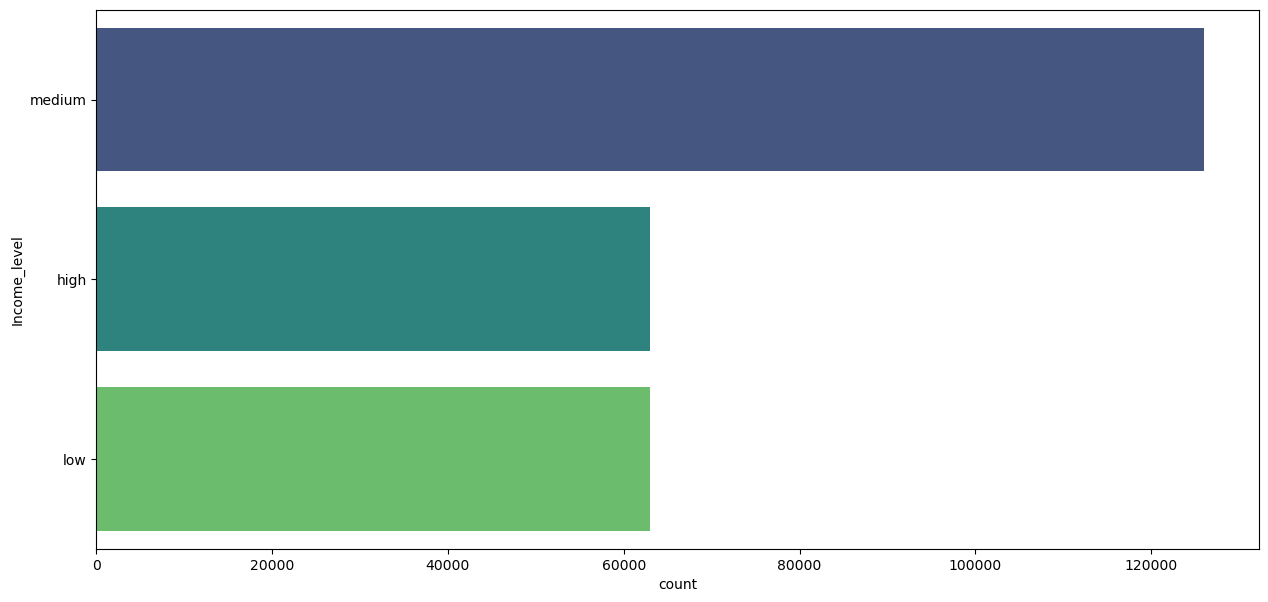

In [1891]:
plt.figure(figsize=(15,7))
sns.countplot(df['Income_level'], palette="viridis")
plt.show()

### Multicollinerity

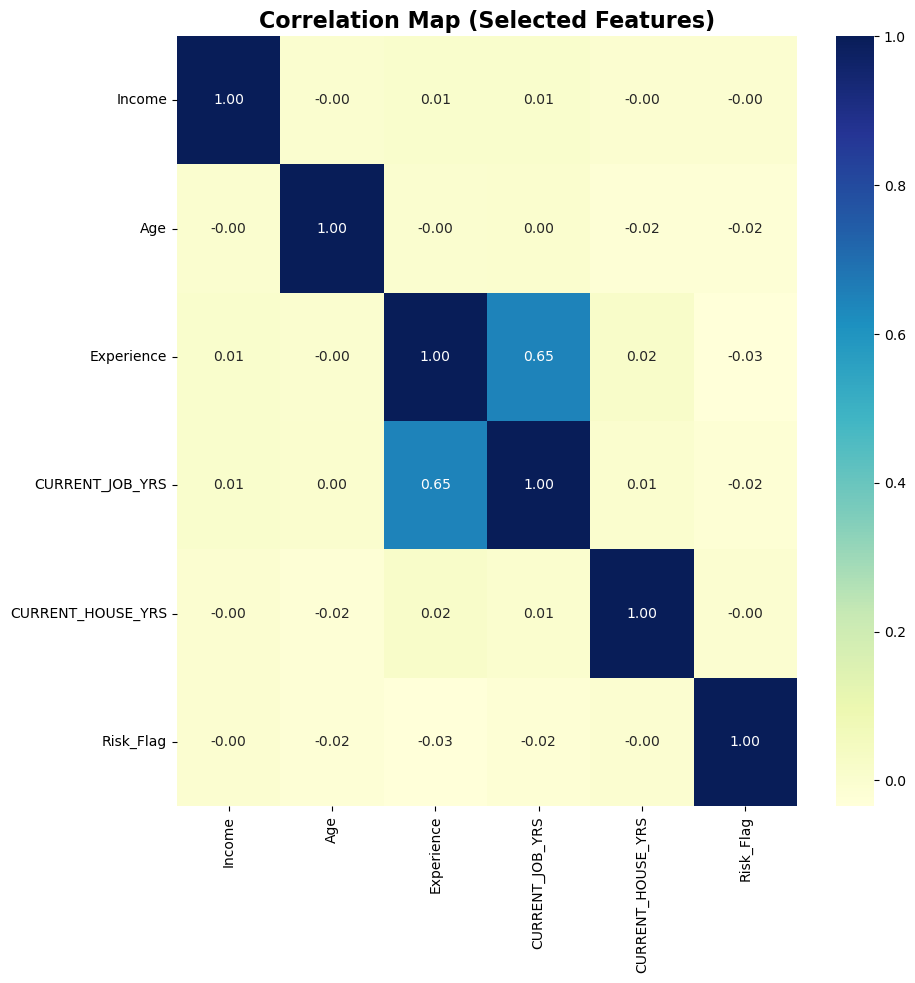

In [1893]:
# Select only the required numeric columns
numeric_cols = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
df_numeric = df[numeric_cols]

# Compute and plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df_numeric.corr(), cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("Correlation Map (Selected Features)", fontweight="bold", fontsize=16)
plt.show()


In [1894]:
# here we can see multicollinerity in data

In [1895]:
df_num=df.select_dtypes('number')
df_num.drop(['Risk_Flag'],axis=1,inplace=True)
df_num.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS'],
      dtype='object')

In [1899]:
# Select only the required numeric columns
df_numeric_features_vif = df[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']]

# Display the first few rows
df_numeric_features_vif.head()


Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0 7315840.000000   71           8                8                 14   
1 9086933.000000   55           7                7                 13   
2 9576258.000000   79          18                6                 11   
3 3208322.000000   55          18                8                 12   
4 3970273.000000   53          14                4                 12   

   Risk_Flag  
0          0  
1          0  
2          0  
3          0  
4          0

In [1903]:
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i)
                     for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns


vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor           Features
0   13.442955  CURRENT_HOUSE_YRS
1    8.556448                Age
2    6.830734    CURRENT_JOB_YRS
3    6.545562         Experience
4    3.879165             Income
5    1.138685          Risk_Flag

In [1904]:
# here only 1 variable has high multicollinerity

In [1906]:
for ind in range(len(df_numeric_features_vif.columns)):
    
    
    vif = pd.DataFrame()    
    
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns


    multi = vif[vif['VIF_Factor'] > 10]
    
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor         Features
0    3.282605           Income
1    4.516214              Age
2    6.339725       Experience
3    6.600896  CURRENT_JOB_YRS
4    1.125014        Risk_Flag


### Encoding

In [1909]:
le=LabelEncoder()

In [1911]:
cols = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE','Income_level']
le=LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

Income  Age  Experience  Married/Single  House_Ownership  \
0 7315840.000000   71           8               0                2   
1 9086933.000000   55           7               1                2   
2 9576258.000000   79          18               1                2   
3 3208322.000000   55          18               1                2   
4 3970273.000000   53          14               1                2   

   Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0              0           0   145     27                8                 14   
1              0           0   255     25                7                 13   
2              1           0   135     10                6                 11   
3              0           0   166     12                8                 12   
4              0           0   263     13                4                 12   

   Risk_Flag  Income_level  
0          0             2  
1          0             0  
2          0             0  
3          0             2  
4          0             2

In [1913]:
df_copy=df.copy()

### Scaling

In [1917]:
df.loc[:,['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS'] ] = df.loc[:,['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']].apply(lambda rec: (rec - rec.mean()) / rec.std())

df.head()

Income      Age  Experience  Married/Single  House_Ownership  \
0  0.805622 1.233370   -0.347304               0                2   
1  1.420945 0.295705   -0.513889               1                2   
2  1.590949 1.702202    1.318553               1                2   
3 -0.621435 0.295705    1.318553               1                2   
4 -0.356714 0.178497    0.652210               1                2   

   Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0              0           0   145     27         0.456868           1.431127   
1              0           0   255     25         0.182673           0.716349   
2              1           0   135     10        -0.091523          -0.713206   
3              0           0   166     12         0.456868           0.001571   
4              0           0   263     13        -0.639913           0.001571   

   Risk_Flag  Income_level  
0          0             2  
1          0             0  
2          0             0  
3          0             2  
4          0             2

In [1920]:
df_feature=df.drop(['Risk_Flag'],axis=1)
df_target = df['Risk_Flag']

In [1921]:
df_feature=sm.add_constant(df_feature)

In [1922]:
df_target.shape

(251994,)

In [1925]:
df_feature.shape

(251994, 13)

### Train- Test split

In [1948]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split dataset (No changes needed here)
x_train, x_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.3, random_state=10)

# Apply SMOTE only on training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

# Print new shapes
print("Original Training Data Shape:", x_train.shape, y_train.shape)
print("Balanced Training Data Shape:", x_train_bal.shape, y_train_bal.shape)
print("Test Data Shape (Remains Same):", x_test.shape, y_test.shape)


Original Training Data Shape: (176395, 13) (176395,)
Balanced Training Data Shape: (309534, 13) (309534,)
Test Data Shape (Remains Same): (75599, 13) (75599,)


In [1395]:
x_train , x_test , y_train, y_test = train_test_split(df_feature,df_target, test_size=0.3, random_state = 10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(176395, 13)
(75599, 13)
(176395,)
(75599,)


In [1950]:
columns = ['Model_Name', 'Cohen_kappa_score', 'Accuracy', 'F1_score','Precision','Recall']

In [1952]:
test_result_table = pd.DataFrame(columns = columns)

# Logistic Regression model

In [1956]:
logreg=sm.Logit(y_train,x_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.370315
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Risk_Flag   No. Observations:               176395
Model:                          Logit   Df Residuals:                   176382
Method:                           MLE   Df Model:                           12
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                0.004786
Time:                        16:05:37   Log-Likelihood:                -65322.
converged:                       True   LL-Null:                       -65636.
Covariance Type:            nonrobust   LLR p-value:                9.617e-127
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4573      0.053    -46.161      0.000      -2.562      -2.353
Income               -0.0387      0.008     -4.942      0.000      -0.054      -0.023
Age                  -0.0662      0.007     -9.099      0.000      -0.080      -0.052
Experience           -0.1190      0.010    -12.065      0.000      -0.138      -0.100
Married/Single        0.2284      0.026      8.872      0.000       0.178       0.279
House_Ownership       0.2054      0.021      9.867      0.000       0.165       0.246
Car_Ownership        -0.1565      0.016     -9.614      0.000      -0.188      -0.125
Profession            0.0004      0.001      0.711      0.477      -0.001       0.002
CITY               7.545e-05    7.9e-05      0.955      0.339   -7.94e-05       0.000
STATE                -0.0013      0.001     -1.652      0.098      -0.003       0.000
CURRENT_JOB_YRS       0.0247      0.010      2.513      0.012       0.005       0.044
CURRENT_HOUSE_YRS    -0.0108      0.007     -1.487      0.137      -0.025       0.003
Income_level         -0.0579      0.010     -6.055      0.000      -0.077      -0.039
=====================================================================================
"""

In [1957]:
# here we can see that pseudo r sq value is very less and there are some insignificant variables too

In [1960]:
print('AIC:', logreg.aic)

AIC: 130669.29052651823


In [1962]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

Odds
const             0.085668
Income            0.962064
Age               0.935937
Experience        0.887787
Married/Single    1.256584
House_Ownership   1.228028
Car_Ownership     0.855152
Profession        1.000428
CITY              1.000075
STATE             0.998695
CURRENT_JOB_YRS   1.024976
CURRENT_HOUSE_YRS 0.989224
Income_level      0.943737

In [1964]:
y_pred_prob_train = logreg.predict(x_train)
y_pred_prob_train.head()

202091   0.097985
239619   0.139070
31954    0.115577
126468   0.108533
160459   0.120781
dtype: float64

In [1966]:
y_pred_train = [ 0 if x < 0.2 else 1 for x in y_pred_prob_train]

In [1968]:
y_pred_train[0:5]

[0, 0, 0, 0, 0]

In [1970]:
acc_table = classification_report(y_train, y_pred_train)

print(acc_table)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    154767
           1       0.00      0.00      0.00     21628

    accuracy                           0.88    176395
   macro avg       0.44      0.50      0.47    176395
weighted avg       0.77      0.88      0.82    176395



In [1972]:
y_pred_prob = logreg.predict(x_test)
y_pred_prob.head()

58851    0.119095
18595    0.099390
163702   0.128666
225081   0.114749
12043    0.088154
dtype: float64

In [1974]:
y_pred = [ 0 if x < 0.2 else 1 for x in y_pred_prob]

In [1976]:
y_pred[0:5]

[0, 0, 0, 0, 0]

In [1978]:
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.00      0.00      0.00      9367

    accuracy                           0.88     75599
   macro avg       0.44      0.50      0.47     75599
weighted avg       0.77      0.88      0.82     75599



In [1980]:
cohen_kappa_score_base=cohen_kappa_score(y_test,y_pred)
cohen_kappa_score_base

0.0

#### Confusion Matrix

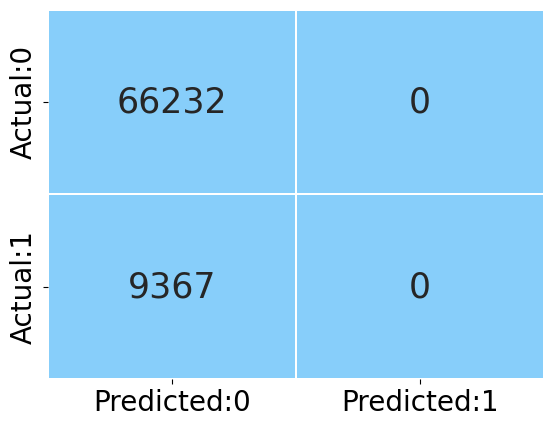

In [1983]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)


plt.yticks(fontsize = 20)

plt.show()

#### Roc curve

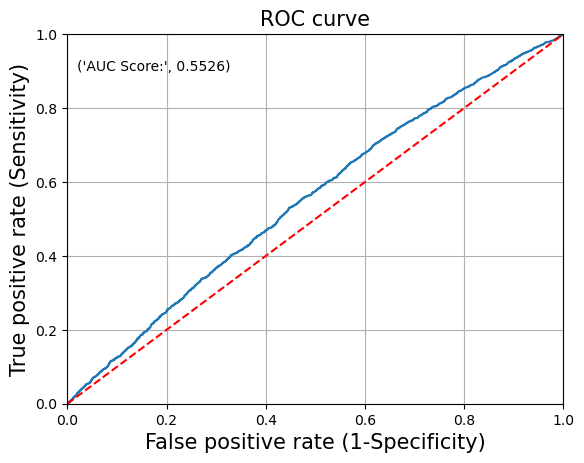

In [1986]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

In [1988]:
## test report for base model

In [1990]:
# Create a DataFrame instead of a Series
Logistic_reg_base = pd.DataFrame({
    'Model_Name': ["Logistic_Regression base"],
    'Cohen_kappa_score': [cohen_kappa_score_base],
    'Accuracy': [0.88],
    'F1_score': [0.0],
    'Precision': [0.0],
    'Recall': [0.0]
})

# Append to the result table using concat
test_result_table = pd.concat([test_result_table, Logistic_reg_base], ignore_index=True)

# Display the updated result table
print(test_result_table)


                 Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision  \
0  Logistic_Regression base           0.000000  0.880000  0.000000   0.000000   

    Recall  
0 0.000000  


#### Youden Index (best cut off value)

In [1993]:

youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR


youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

TPR      FPR  Threshold  Difference
0 0.530373 0.447004   0.124962    0.083368
1 0.530373 0.447065   0.124957    0.083308
2 0.530479 0.447261   0.124949    0.083218
3 0.530479 0.447276   0.124946    0.083203
4 0.530373 0.447201   0.124955    0.083172

In [1995]:
y_pred_new = [ 0 if x < 0.12 else 1 for x in y_pred_prob]

In [1997]:
y_pred_new[0:5]

[0, 0, 1, 0, 0]

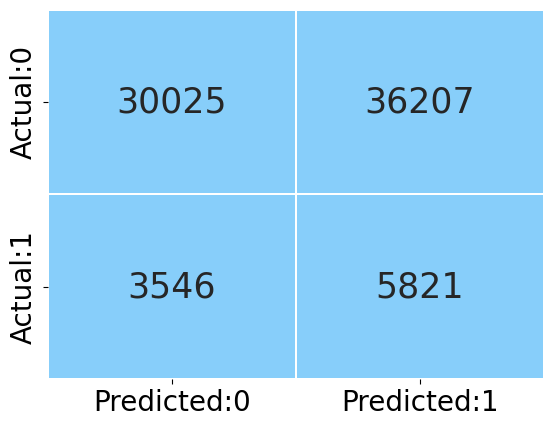

In [1999]:

cm = confusion_matrix(y_test, y_pred_new)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)


plt.yticks(fontsize = 20)

plt.show()

In [2001]:
acc_table = classification_report(y_test, y_pred_new)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.89      0.45      0.60     66232
           1       0.14      0.62      0.23      9367

    accuracy                           0.47     75599
   macro avg       0.52      0.54      0.41     75599
weighted avg       0.80      0.47      0.56     75599



In [2003]:
cohen_kappa_youden=cohen_kappa_score(y_test,y_pred_new)
cohen_kappa_youden

0.029944889480093884

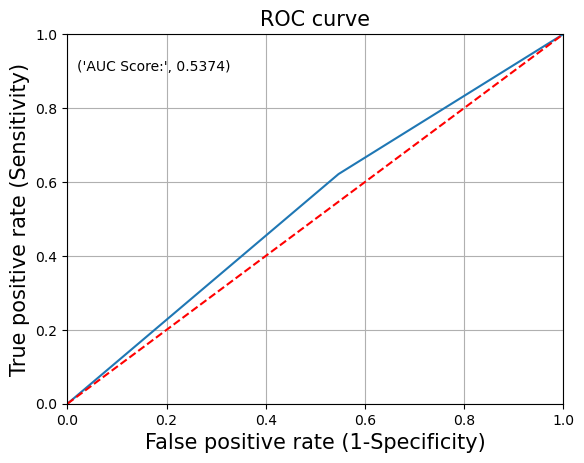

In [2005]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_new)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_new),4)))
                               
# plot the grid
plt.grid(True)

In [2007]:
import pandas as pd

# Define the initial result table if it doesn't exist
test_result_table = pd.DataFrame(columns=['Model_Name', 'Cohen_kappa_score', 'Accuracy', 'F1_score', 'Precision', 'Recall'])


test_result_table = pd.concat([test_result_table, Logistic_reg_base], ignore_index=True)

# Create the logistic regression with Youden’s index row
Logistic_reg_youden = pd.DataFrame([{
    'Model_Name': "Logistic_Regression with Youdens index",
    'Cohen_kappa_score': 0.029945,
    'Accuracy': 0.47,
    'F1_score': 0.23,
    'Precision': 0.14,
    'Recall': 0.62
}])

# Append using concat
test_result_table = pd.concat([test_result_table, Logistic_reg_youden], ignore_index=True)

# Print the DataFrame in the required format
print(test_result_table.to_string(index=False))


                            Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
              Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000


#### recursive feature elimination

In [2010]:
X_train_rfe = x_train.iloc[:,1:]
X_test_rfe = x_test.iloc[:,1:]

logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select = None)


rfe_model = rfe_model.fit(X_train_rfe, y_train)


feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Income_level'],
      dtype='object')


In [2011]:
x_test_rfe=x_test[['const', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Income_level']]

In [2012]:
x_train_rfe=x_train[['const', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Income_level']]

#### Improved Model

In [2014]:
logreg_rfe = sm.Logit(y_train, x_train[['const', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Income_level']]).fit()

print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.370420
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Risk_Flag   No. Observations:               176395
Model:                          Logit   Df Residuals:                   176388
Method:                           MLE   Df Model:                            6
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                0.004503
Time:                        16:06:01   Log-Likelihood:                -65340.
converged:                       True   LL-Null:                       -65636.
Covariance Type:            nonrobust   LLR p-value:                1.900e-124
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.4760      0.049    -50.824      0.000      -2.571      -2.380
Age           

In [2015]:
print('AIC:', logreg_rfe.aic)

AIC: 130694.43498199289


In [2016]:
y_pred_train_rfe=logreg_rfe.predict(x_train_rfe)
y_pred_train_rfe

202091   0.098100
239619   0.140609
31954    0.116011
126468   0.114537
160459   0.114318
95780    0.082782
23618    0.137695
41359    0.155940
16150    0.095137
36096    0.077736
242133   0.099315
196847   0.157667
42022    0.118937
105304   0.097410
86154    0.121222
151939   0.106601
62440    0.124679
10742    0.143925
145145   0.161445
42969    0.123360
54100    0.118252
92280    0.107729
123554   0.096679
23829    0.128876
212958   0.145351
64087    0.114475
39990    0.123757
198073   0.121278
175529   0.082447
216885   0.140253
144867   0.086570
94178    0.140673
211473   0.130102
167643   0.108585
87043    0.148127
44706    0.091350
216834   0.101443
178336   0.143530
37126    0.132459
188295   0.141029
109023   0.109730
240283   0.099375
198142   0.139025
96942    0.103817
84213    0.094396
210051   0.128387
44753    0.151704
206620   0.121115
168206   0.136542
158359   0.121648
156734   0.124803
43428    0.106102
109078   0.135009
86956    0.161966
172474   0.125434
20683    0

In [2018]:
y_pred_prob_rfe_test = logreg_rfe.predict(x_test_rfe)
y_pred_prob_rfe_test.head()

58851    0.122441
18595    0.097985
163702   0.123011
225081   0.108371
12043    0.092667
dtype: float64

In [2026]:
y_pred_rfe_test = [ 0 if x < 0.12 else 1 for x in y_pred_prob_rfe_test]

In [2028]:
y_pred_rfe_test[0:5]

[1, 0, 1, 0, 0]

#### Confusion Matrix

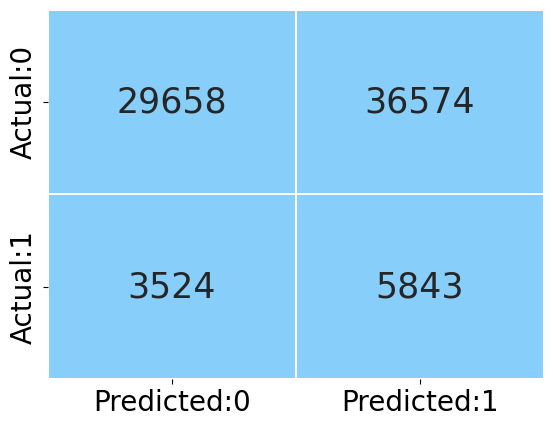

In [2031]:

cm = confusion_matrix(y_test, y_pred_rfe_test)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)


plt.yticks(fontsize = 20)

plt.show()

In [2033]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

In [2035]:
acc_table = classification_report(y_test, y_pred_rfe_test)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.89      0.45      0.60     66232
           1       0.14      0.62      0.23      9367

    accuracy                           0.47     75599
   macro avg       0.52      0.54      0.41     75599
weighted avg       0.80      0.47      0.55     75599



In [2037]:
cohen_kappa_score_logreg_rfe=cohen_kappa_score(y_test,y_pred_rfe_test)
cohen_kappa_score_logreg_rfe

0.028463062263394123

#### Roc curve

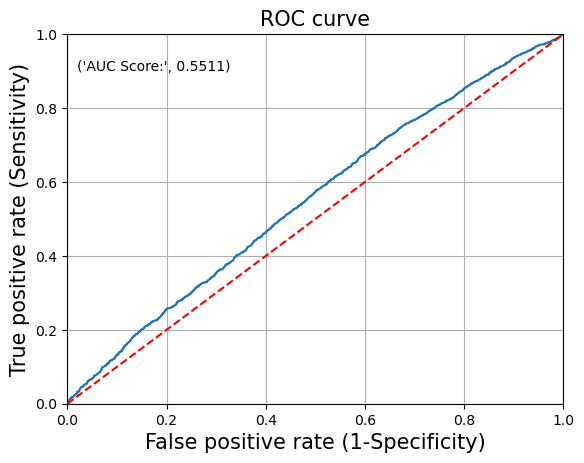

In [2040]:
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfe_test)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_rfe_test),4)))
                               
# plot the grid
plt.grid(True)

In [2042]:
# test Report

In [2044]:
Logistic_reg_rfe_youden = pd.DataFrame([{
    'Model_Name': "Logistic_Regression with Youdens index and rfe",
    'Cohen_kappa_score': cohen_kappa_score_logreg_rfe,
    'Accuracy': 0.47,
    'F1_score': 0.23,
    'Precision': 0.14,
    'Recall': 0.62
}])

# Append using concat
test_result_table = pd.concat([test_result_table, Logistic_reg_rfe_youden], ignore_index=True)

# Print the updated DataFrame in a formatted way
print(test_result_table.to_string(index=False))


                                    Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                      Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
        Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000


In [2047]:
# here we can see that youden index made some change in model , but rfe dosenot

In [2049]:
# next model

In [2051]:
df_copy.head()

Income  Age  Experience  Married/Single  House_Ownership  \
0 7315840.000000   71           8               0                2   
1 9086933.000000   55           7               1                2   
2 9576258.000000   79          18               1                2   
3 3208322.000000   55          18               1                2   
4 3970273.000000   53          14               1                2   

   Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0              0           0   145     27                8                 14   
1              0           0   255     25                7                 13   
2              1           0   135     10                6                 11   
3              0           0   166     12                8                 12   
4              0           0   263     13                4                 12   

   Risk_Flag  Income_level  
0          0             2  
1          0             0  
2          0             0  
3          0             2  
4          0             2

In [2053]:
df_copy.shape

(251994, 13)

In [2055]:
df_feat=df_copy.drop(['Risk_Flag'],axis=1)
df_feat.head()

Income  Age  Experience  Married/Single  House_Ownership  \
0 7315840.000000   71           8               0                2   
1 9086933.000000   55           7               1                2   
2 9576258.000000   79          18               1                2   
3 3208322.000000   55          18               1                2   
4 3970273.000000   53          14               1                2   

   Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0              0           0   145     27                8                 14   
1              0           0   255     25                7                 13   
2              1           0   135     10                6                 11   
3              0           0   166     12                8                 12   
4              0           0   263     13                4                 12   

   Income_level  
0             2  
1             0  
2             0  
3             2  
4             2

In [2057]:
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Risk_Flag, dtype: int64

In [2059]:
x_train , x_test , y_train, y_test = train_test_split(df_feat,df_target, test_size=0.3, random_state = 10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(176395, 12)
(75599, 12)
(176395,)
(75599,)


In [2061]:
def get_train_report(model):
    

    train_pred = model.predict(x_train)

  
    print(classification_report(y_train, train_pred))
    kappa_sc=cohen_kappa_score(y_train,train_pred)
    print('cohen_kappa_score:',kappa_sc)
    return

In [2063]:
def get_test_report(model):
    
  
    test_pred = model.predict(x_test)

    
    print(classification_report(y_test, test_pred),'\n')
    kappa_sc=cohen_kappa_score(y_test,test_pred)
    print('cohen_kappa_score:',kappa_sc,'\n')
    print('Confusion Matrix','\n')
    cm = confusion_matrix(y_test, test_pred)


    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)


    plt.yticks(fontsize = 20)

    plt.show()
    
    print('Roc Curve','\n')
    
    fpr,tpr,threshold=roc_curve(y_test,test_pred)
    plt.plot(fpr,tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve ',
           fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', 
           fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)',
           fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', 
                                 round(metrics.roc_auc_score(y_test, test_pred),4)))
                               
    plt.grid(True)
    
    return

# Decision Tree

In [2066]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree = decision_tree_classification.fit(x_train, y_train)

In [2067]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96    154767
           1       0.72      0.79      0.76     21628

    accuracy                           0.94    176395
   macro avg       0.85      0.87      0.86    176395
weighted avg       0.94      0.94      0.94    176395

cohen_kappa_score: 0.7208686250779541
None


              precision    recall  f1-score   support

           0       0.94      0.93      0.93     66232
           1       0.52      0.56      0.54      9367

    accuracy                           0.88     75599
   macro avg       0.73      0.74      0.74     75599
weighted avg       0.89      0.88      0.88     75599
 

cohen_kappa_score: 0.47346778276559964 

Confusion Matrix 



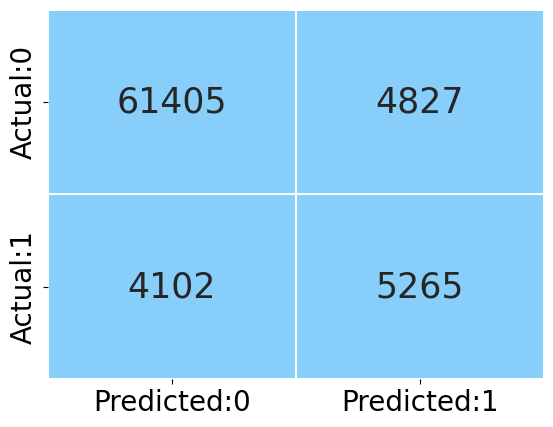

Roc Curve 

None


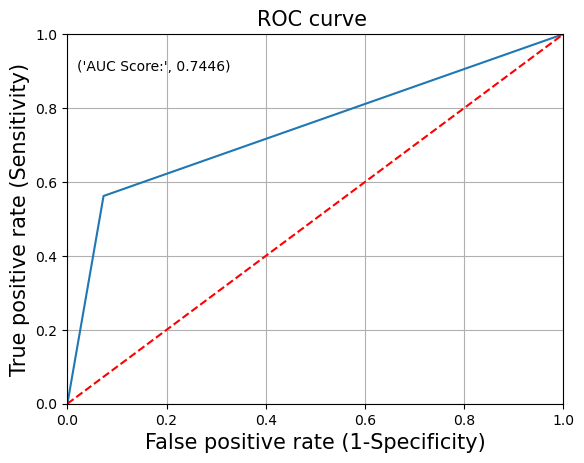

In [2070]:
test_report = get_test_report(decision_tree)

print(test_report)

In [2072]:
Decision_tree = pd.DataFrame([{
    'Model_Name': "Decision Tree",
    'Cohen_kappa_score': 0.473,
    'Accuracy': 0.88,
    'F1_score': 0.54,
    'Precision': 0.52,
    'Recall': 0.56
}])

# Append using concat
test_result_table = pd.concat([test_result_table, Decision_tree], ignore_index=True)

# Print the updated DataFrame in a readable format
print(test_result_table.to_string(index=False))


                                    Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                      Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
        Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                 Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000


In [2074]:
# we can see the difference between the accuracy of train data and test data

### Hypertuning

In [2077]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                    'max_features': ["sqrt", "log2"],
                    'min_samples_split': range(2,10)}]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 2} 



### Tuned Model

In [2079]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 9,
                                  max_features = 'sqrt',
                                  min_samples_split = 2,
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(x_train, y_train)

In [2080]:
print( get_train_report(dt_model))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    154767
           1       0.65      0.05      0.09     21628

    accuracy                           0.88    176395
   macro avg       0.77      0.52      0.51    176395
weighted avg       0.85      0.88      0.83    176395

cohen_kappa_score: 0.07742879616071974
None


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.59      0.04      0.08      9367

    accuracy                           0.88     75599
   macro avg       0.73      0.52      0.51     75599
weighted avg       0.84      0.88      0.83     75599
 

cohen_kappa_score: 0.06366352007617193 

Confusion Matrix 



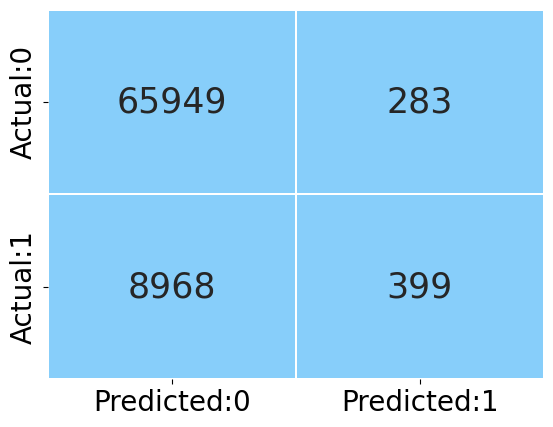

Roc Curve 

None


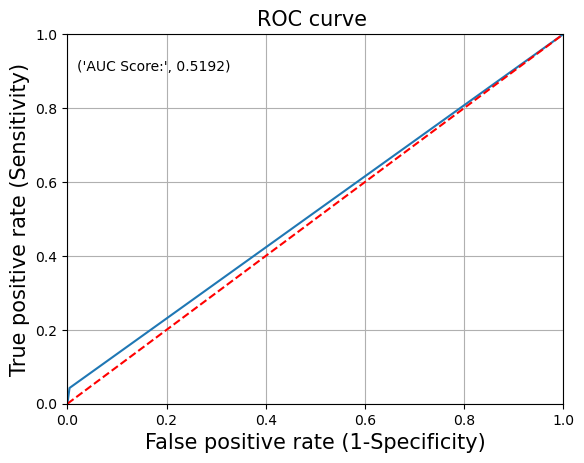

In [2081]:
print( get_test_report(dt_model))

In [2082]:

Decision_tree_tuned = pd.DataFrame([{
    'Model_Name': "Decision Tree with tuned parameters",
    'Cohen_kappa_score': 0.064,
    'Accuracy': 0.88,
    'F1_score': 0.08,
    'Precision': 0.59,
    'Recall': 0.04
}])

test_result_table = pd.concat([test_result_table, Decision_tree_tuned], ignore_index=True)

print(test_result_table.to_string(index=False))

                                    Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                      Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
        Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                 Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
           Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000


# Random forest

In [2084]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rft_model = rf_classification.fit(x_train, y_train)

In [2085]:
train_report = get_train_report(rft_model)

print(train_report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96    154767
           1       0.71      0.78      0.74     21628

    accuracy                           0.93    176395
   macro avg       0.84      0.87      0.85    176395
weighted avg       0.94      0.93      0.93    176395

cohen_kappa_score: 0.7021312229441523
None


              precision    recall  f1-score   support

           0       0.93      0.95      0.94     66232
           1       0.60      0.53      0.56      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.74      0.75     75599
weighted avg       0.89      0.90      0.89     75599
 

cohen_kappa_score: 0.5045514657907894 

Confusion Matrix 



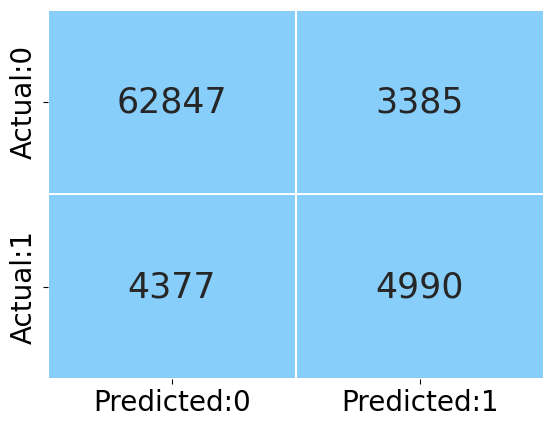

Roc Curve 

None


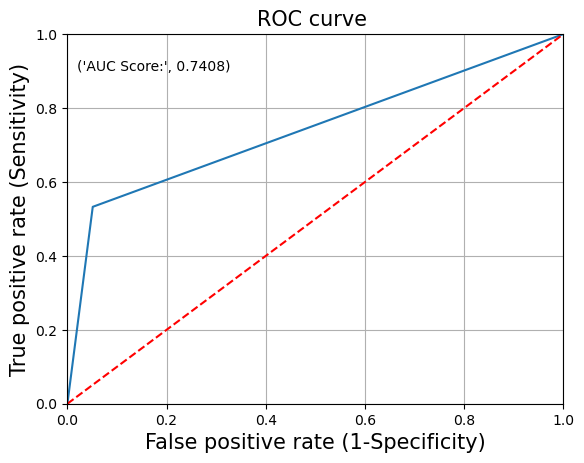

In [2086]:
test_report = get_test_report(rft_model)

print(test_report) 

In [2087]:
Random_forest = pd.DataFrame([{
    'Model_Name': "Random Forest",
    'Cohen_kappa_score': 0.505,
    'Accuracy': 0.90,
    'F1_score': 0.56,
    'Precision': 0.60,
    'Recall': 0.53
}])

test_result_table = pd.concat([test_result_table, Random_forest], ignore_index=True)

print(test_result_table.to_string(index=False))

                                    Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                      Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
        Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                 Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
           Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                 Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000


### Hypertuning

In [2089]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90]}]

random_forest_classification = RandomForestClassifier(random_state = 10)


rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(x_train, y_train)


print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'n_estimators': 70} 



### Tuned Model

In [2091]:
rf_model = RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators = 70,
                                  random_state = 10)

rf_model = rf_model.fit(x_train, y_train)




In [2092]:
print('Classification Report for test set:\n', get_train_report(rf_model))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96    154767
           1       0.72      0.80      0.76     21628

    accuracy                           0.94    176395
   macro avg       0.85      0.88      0.86    176395
weighted avg       0.94      0.94      0.94    176395

cohen_kappa_score: 0.7232247805557119
Classification Report for test set:
 None


              precision    recall  f1-score   support

           0       0.93      0.95      0.94     66232
           1       0.61      0.53      0.56      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.74      0.75     75599
weighted avg       0.89      0.90      0.90     75599
 

cohen_kappa_score: 0.50755091974374 

Confusion Matrix 



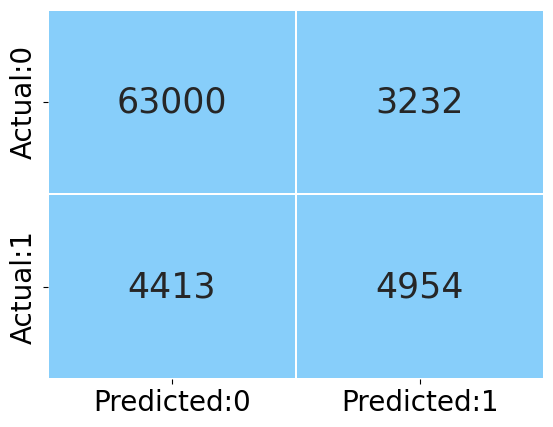

Roc Curve 

Classification Report for test set:
 None


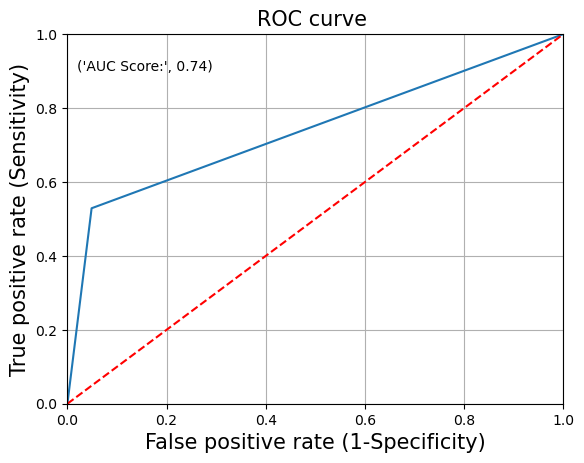

In [2093]:
print('Classification Report for test set:\n', get_test_report(rf_model))

In [2094]:

Random_forest_tuned = pd.DataFrame([{
    'Model_Name': "Random Forest with tuned parameters",
    'Cohen_kappa_score': 0.508,
    'Accuracy': 0.90,
    'F1_score': 0.56,
    'Precision': 0.61,
    'Recall': 0.53
}])

test_result_table = pd.concat([test_result_table, Random_forest_tuned], ignore_index=True)

print(test_result_table.to_string(index=False))

                                    Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                      Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
        Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                 Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
           Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                 Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
           Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000


# Boosting techniques

In [2096]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

## Ada Boosting

In [2098]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [2099]:
train_report = get_train_report(ada_model)
print(train_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    154767
           1       0.71      0.00      0.00     21628

    accuracy                           0.88    176395
   macro avg       0.79      0.50      0.47    176395
weighted avg       0.86      0.88      0.82    176395

cohen_kappa_score: 0.0018316734881467234
None


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.56      0.00      0.00      9367

    accuracy                           0.88     75599
   macro avg       0.72      0.50      0.47     75599
weighted avg       0.84      0.88      0.82     75599
 

cohen_kappa_score: 0.0008288802291578357 

Confusion Matrix 



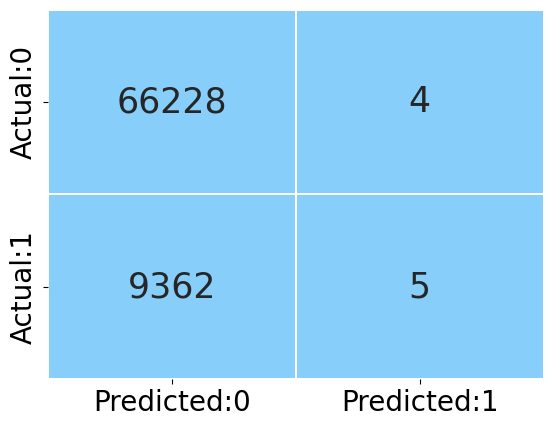

Roc Curve 

None


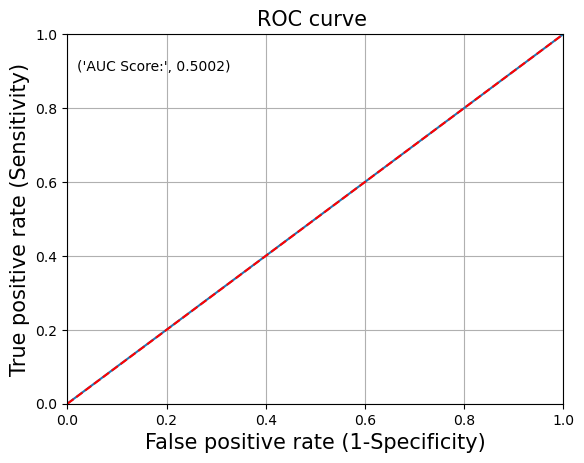

In [2100]:
test_report = get_test_report(ada_model)
print(test_report)

In [2101]:
Ada_boosting = pd.DataFrame([{
    'Model_Name': "Ada Boosting",
    'Cohen_kappa_score': 0.0008,
    'Accuracy': 0.88,
    'F1_score': 0.00,
    'Precision': 0.56,
    'Recall': 0.00
}])

test_result_table = pd.concat([test_result_table, Ada_boosting], ignore_index=True)

print(test_result_table.to_string(index=False))


                                    Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                      Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
        Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                 Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
           Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                 Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
           Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                  Ada Boosting           0.000800  0.880000  0.000000   0.560000 0.000000


# Gradient Boosting

In [2103]:
Grad_model = GradientBoostingClassifier(n_estimators = 40, random_state = 10)

Grad_model.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=40, random_state=10)

In [2104]:
train_report = get_train_report(Grad_model)
print(train_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    154767
           1       0.82      0.00      0.00     21628

    accuracy                           0.88    176395
   macro avg       0.85      0.50      0.47    176395
weighted avg       0.87      0.88      0.82    176395

cohen_kappa_score: 0.0018076369263652081
None


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.89      0.00      0.00      9367

    accuracy                           0.88     75599
   macro avg       0.88      0.50      0.47     75599
weighted avg       0.88      0.88      0.82     75599
 

cohen_kappa_score: 0.0014689642264484881 

Confusion Matrix 



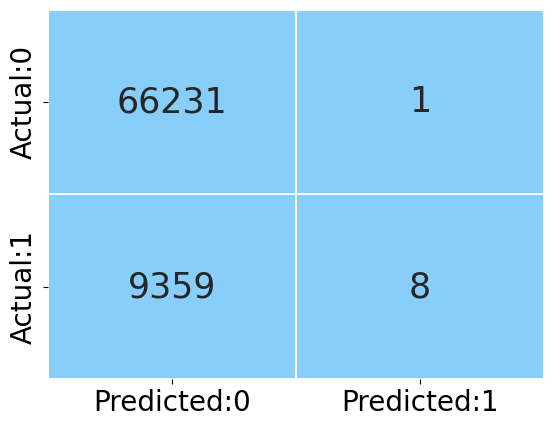

Roc Curve 

None


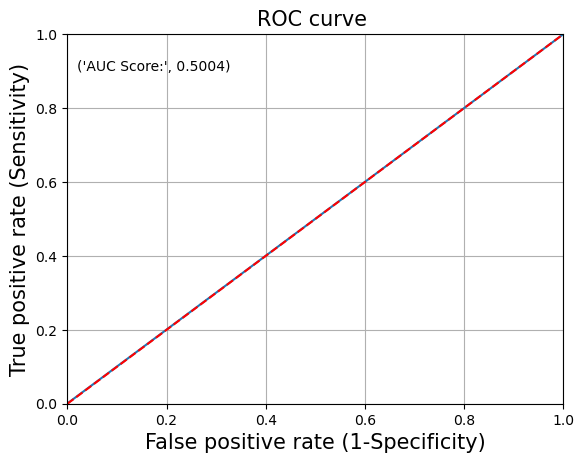

In [2105]:
test_report = get_test_report(Grad_model)
print(test_report)

In [2106]:
Gradient_boosting = pd.DataFrame([{
    'Model_Name': "Gradient Boosting",
    'Cohen_kappa_score': 0.0014,
    'Accuracy': 0.88,
    'F1_score': 0.00,
    'Precision': 0.89,
    'Recall': 0.00
}])

test_result_table = pd.concat([test_result_table, Gradient_boosting], ignore_index=True)

print(test_result_table.to_string(index=False))


                                    Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                      Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
        Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                 Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
           Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                 Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
           Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                  Ada Boosting           0.000800  0.880000  0.000000   0.560000 0.000000
                             Gradient Boosting

## XG Boosting

In [2108]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [2109]:
train_report = get_train_report(xgb_model)

print(train_report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95    154767
           1       0.70      0.35      0.46     21628

    accuracy                           0.90    176395
   macro avg       0.81      0.66      0.70    176395
weighted avg       0.89      0.90      0.89    176395

cohen_kappa_score: 0.4156739457172769
None


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     66232
           1       0.63      0.30      0.40      9367

    accuracy                           0.89     75599
   macro avg       0.77      0.64      0.67     75599
weighted avg       0.87      0.89      0.87     75599
 

cohen_kappa_score: 0.35156547897656476 

Confusion Matrix 



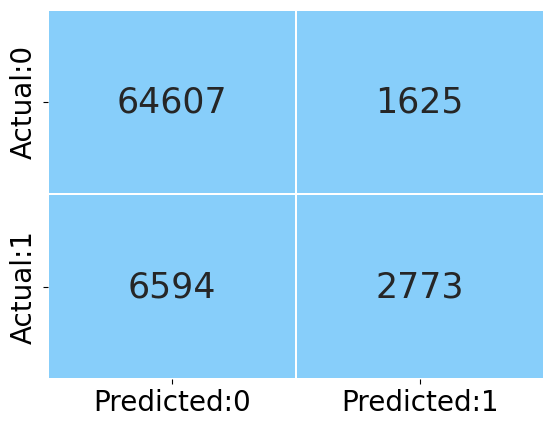

Roc Curve 

None


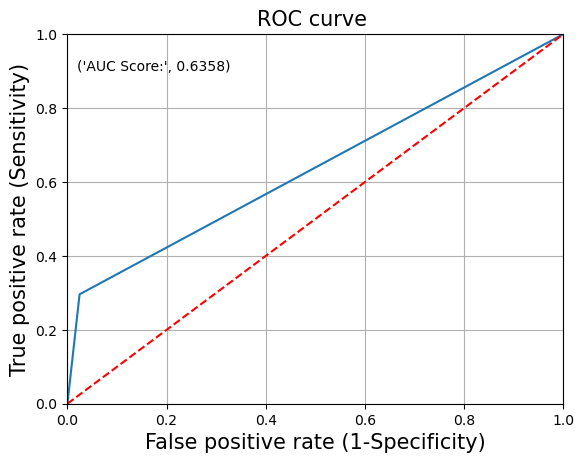

In [2110]:
test_report = get_test_report(xgb_model)

print(test_report)

In [2111]:
xg_boosting = pd.DataFrame([{
    'Model_Name': "XG Boosting",
    'Cohen_kappa_score': 0.489,
    'Accuracy': 0.90,
    'F1_score': 0.55,
    'Precision': 0.60,
    'Recall': 0.50
}])

test_result_table = pd.concat([test_result_table, xg_boosting], ignore_index=True)

print(test_result_table.to_string(index=False))


                                    Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                      Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
        Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                 Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
           Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                 Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
           Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                  Ada Boosting           0.000800  0.880000  0.000000   0.560000 0.000000
                             Gradient Boosting

# Stack Generalization

In [2113]:
df_feature.head()

const    Income      Age  Experience  Married/Single  House_Ownership  \
0 1.000000  0.805622 1.233370   -0.347304               0                2   
1 1.000000  1.420945 0.295705   -0.513889               1                2   
2 1.000000  1.590949 1.702202    1.318553               1                2   
3 1.000000 -0.621435 0.295705    1.318553               1                2   
4 1.000000 -0.356714 0.178497    0.652210               1                2   

   Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0              0           0   145     27         0.456868           1.431127   
1              0           0   255     25         0.182673           0.716349   
2              1           0   135     10        -0.091523          -0.713206   
3              0           0   166     12         0.456868           0.001571   
4              0           0   263     13        -0.639913           0.001571   

   Income_level  
0             2  
1             0  
2             0  
3             2  
4             2

In [2114]:
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Risk_Flag, dtype: int64

In [2115]:
x_train_st,x_test_st,y_train_st,y_test_st=train_test_split(df_feature,df_target,random_state=10, test_size=0.3)
x_train_st=x_train_st.drop(['const'],axis=1)
x_test_st=x_test_st.drop(['const'],axis=1)
print(x_train_st.shape)
print(x_test_st.shape)
print(y_train_st.shape)
print(y_test_st.shape)

(176395, 12)
(75599, 12)
(176395,)
(75599,)


In [2116]:
def get_train_report_st(model):
    

    train_pred_st = model.predict(x_train_st)

  
    print(classification_report(y_train_st, train_pred_st))
    kappa_sc_st=cohen_kappa_score(y_train_st,train_pred_st)
    print('cohen_kappa_score:',kappa_sc_st)
    return

In [2117]:
def get_test_report_st(model):
    

    test_pred_st = model.predict(x_test_st)

  
    print(classification_report(y_test_st, test_pred_st))
    kappa_sc_st=cohen_kappa_score(y_test_st,test_pred_st)
    print('cohen_kappa_score:',kappa_sc_st,'\n')
    print('Confusion Matrix','\n')
    cm = confusion_matrix(y_test, test_pred_st)


    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)


    plt.yticks(fontsize = 20)

    plt.show()
    
    print('Roc Curve','\n')
    
    fpr,tpr,threshold=roc_curve(y_test,test_pred_st)
    plt.plot(fpr,tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve ',
           fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', 
           fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)',
           fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', 
                                 round(metrics.roc_auc_score(y_test, test_pred_st),4)))
                               
    plt.grid(True)
    
    return
    

In [2118]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 70, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]


stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())


stack_model.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=70,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

In [2119]:
train_report_st = get_train_report_st(stack_model)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    154767
           1       0.55      0.66      0.60     21628

    accuracy                           0.89    176395
   macro avg       0.75      0.79      0.77    176395
weighted avg       0.90      0.89      0.90    176395

cohen_kappa_score: 0.5410417274991239
None


              precision    recall  f1-score   support

           0       0.95      0.92      0.93     66232
           1       0.53      0.63      0.57      9367

    accuracy                           0.88     75599
   macro avg       0.74      0.78      0.75     75599
weighted avg       0.89      0.88      0.89     75599

cohen_kappa_score: 0.5076523185294926 

Confusion Matrix 



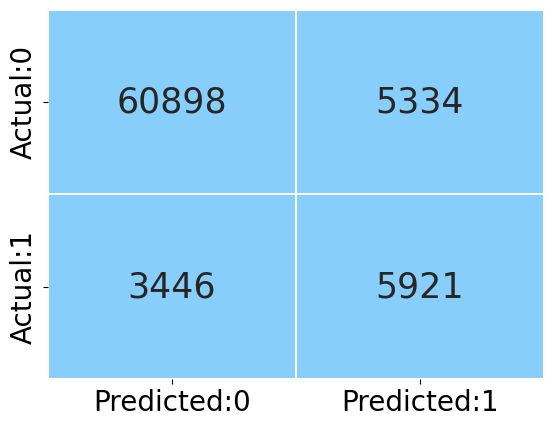

Roc Curve 

None


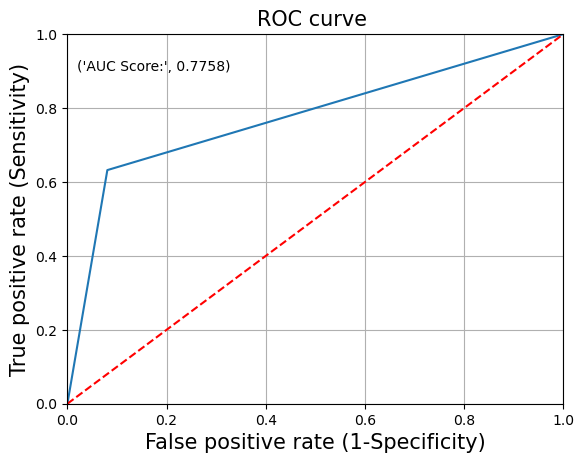

In [2120]:
test_report_st = get_test_report_st(stack_model)

print(test_report_st)

In [2121]:
Stack_Generalization = pd.DataFrame([{
    'Model_Name': "Stack Generalization (final est: GaussianNB)",
    'Cohen_kappa_score': 0.508,
    'Accuracy': 0.88,
    'F1_score': 0.57,
    'Precision': 0.53,
    'Recall': 0.63
}])

test_result_table = pd.concat([test_result_table, Stack_Generalization], ignore_index=True)

print(test_result_table.to_string(index=False))

                                    Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                      Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
        Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                 Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
           Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                 Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
           Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                  Ada Boosting           0.000800  0.880000  0.000000   0.560000 0.000000
                             Gradient Boosting

### Stack with Gradient Boosting

In [2124]:
base_learner = [('DT',DecisionTreeClassifier() ),
               ('RF', RandomForestClassifier())]

stack = StackingClassifier(estimators = base_learner, final_estimator = GradientBoostingClassifier())
stack.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                               ('RF', RandomForestClassifier())],
                   final_estimator=GradientBoostingClassifier())

In [2125]:
train_report_st = get_train_report_st(stack)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95    154767
           1       0.61      0.67      0.64     21628

    accuracy                           0.91    176395
   macro avg       0.78      0.81      0.79    176395
weighted avg       0.91      0.91      0.91    176395

cohen_kappa_score: 0.5860745585642528
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.64      0.61      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.79      0.78     75599
weighted avg       0.90      0.90      0.90     75599

cohen_kappa_score: 0.5564588231376564 

Confusion Matrix 



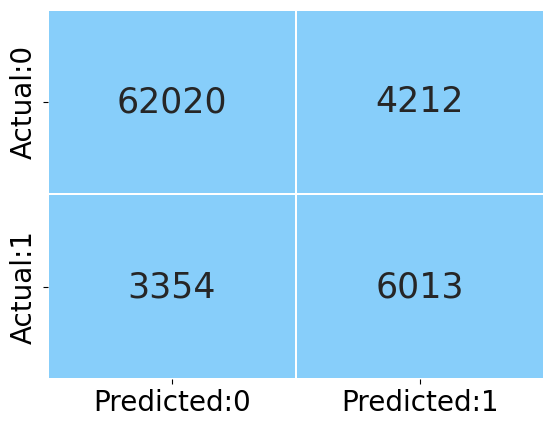

Roc Curve 

None


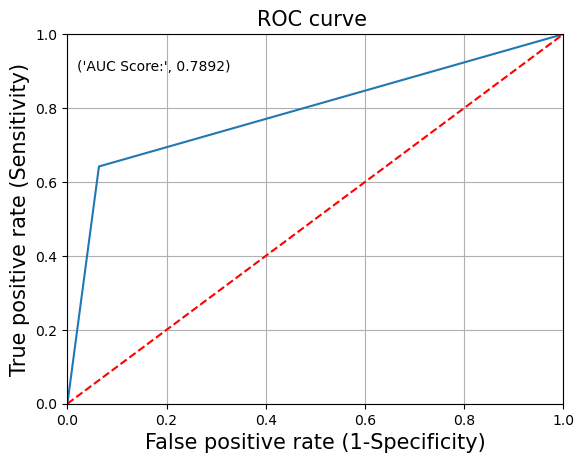

In [2126]:
test_report_st = get_test_report_st(stack)

print(test_report_st)

In [2127]:
stack_grad_boosting = pd.DataFrame([{
    'Model_Name': "Stack with Gradient Boosting",
    'Cohen_kappa_score': 0.558,
    'Accuracy': 0.90,
    'F1_score': 0.61,
    'Precision': 0.59,
    'Recall': 0.64
}])

test_result_table = pd.concat([test_result_table, stack_grad_boosting], ignore_index=True)

print(test_result_table.to_string(index=False))

                                    Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                      Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
        Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                 Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
           Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                 Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
           Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                  Ada Boosting           0.000800  0.880000  0.000000   0.560000 0.000000
                             Gradient Boosting

### Stack with Ada Boosting

In [2129]:
base_learner = [('DT',DecisionTreeClassifier() ),
               ('RF', RandomForestClassifier())]

stack_ada = StackingClassifier(estimators = base_learner, final_estimator = AdaBoostClassifier())
stack_ada.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                               ('RF', RandomForestClassifier())],
                   final_estimator=AdaBoostClassifier())

In [2130]:
train_report_st = get_train_report_st(stack_ada)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96    154767
           1       0.68      0.85      0.75     21628

    accuracy                           0.93    176395
   macro avg       0.83      0.90      0.86    176395
weighted avg       0.94      0.93      0.94    176395

cohen_kappa_score: 0.7158264873653334
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.61      0.60      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.78      0.77     75599
weighted avg       0.90      0.90      0.90     75599

cohen_kappa_score: 0.5474796629417052 

Confusion Matrix 



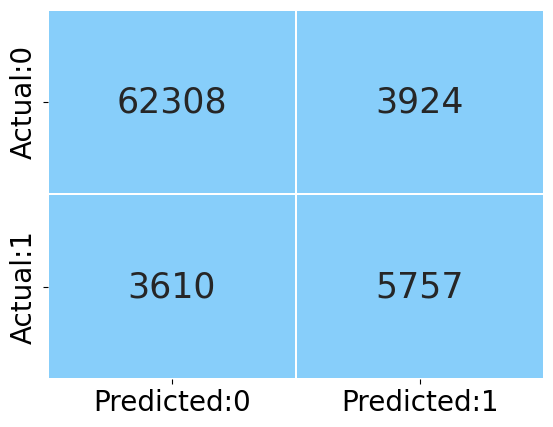

Roc Curve 

None


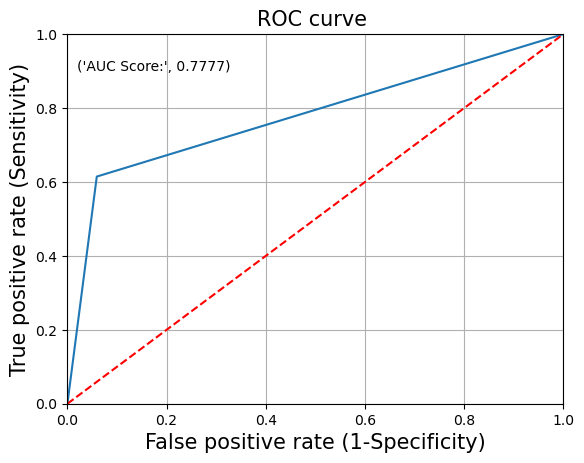

In [2131]:
test_report_st = get_test_report_st(stack_ada)

print(test_report_st)

In [2132]:
stack_ada_boosting = pd.DataFrame([{
    'Model_Name': "Stack with Ada Boosting",
    'Cohen_kappa_score': 0.560,
    'Accuracy': 0.90,
    'F1_score': 0.62,
    'Precision': 0.59,
    'Recall': 0.65
}])

test_result_table = pd.concat([test_result_table, stack_ada_boosting], ignore_index=True)

print(test_result_table.to_string(index=False))


                                    Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                      Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
        Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                 Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
           Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                 Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
           Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                  Ada Boosting           0.000800  0.880000  0.000000   0.560000 0.000000
                             Gradient Boosting

### Stack with XgB

In [2134]:
base_learner = [('DT',DecisionTreeClassifier() ),
               ('RF', RandomForestClassifier())]

stack_xgb = StackingClassifier(estimators = base_learner, final_estimator = XGBClassifier())
stack_xgb.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                               ('RF', RandomForestClassifier())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None,
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [2135]:
train_report_st = get_train_report_st(stack_xgb)

print(test_report_st)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    154767
           1       0.62      0.61      0.61     21628

    accuracy                           0.91    176395
   macro avg       0.78      0.78      0.78    176395
weighted avg       0.91      0.91      0.91    176395

cohen_kappa_score: 0.5604476132437293
None


              precision    recall  f1-score   support

           0       0.94      0.94      0.94     66232
           1       0.59      0.57      0.58      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.76      0.76     75599
weighted avg       0.90      0.90      0.90     75599

cohen_kappa_score: 0.5229929212119282 

Confusion Matrix 



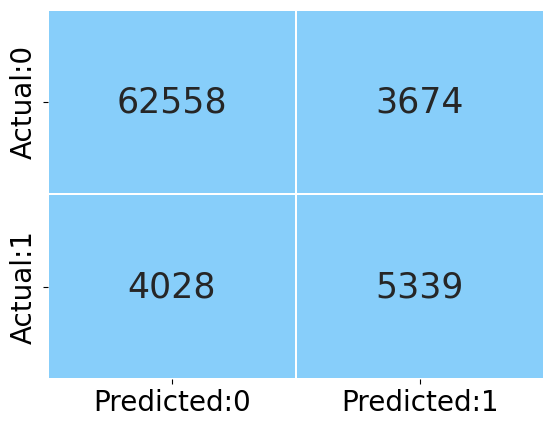

Roc Curve 

None


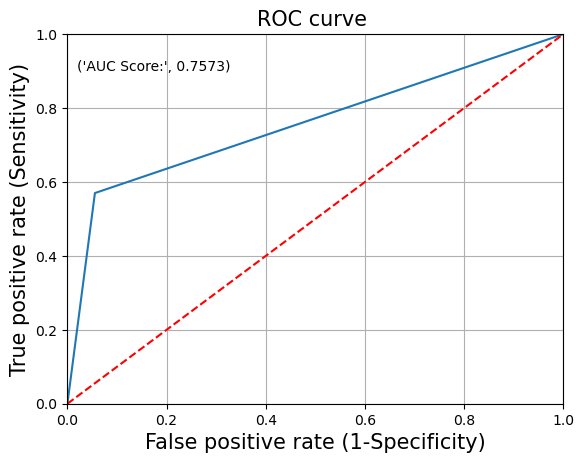

In [2136]:
test_report_st = get_test_report_st(stack_xgb)

print(test_report_st)

In [2137]:
stack_xg_boosting = pd.DataFrame([{
    'Model_Name': "Stack with XG Boosting",
    'Cohen_kappa_score': 0.544,
    'Accuracy': 0.90,
    'F1_score': 0.60,
    'Precision': 0.59,
    'Recall': 0.62
}])

test_result_table = pd.concat([test_result_table, stack_xg_boosting], ignore_index=True)

print(test_result_table.to_string(index=False))


                                    Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                      Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
        Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                 Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
           Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                 Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
           Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                  Ada Boosting           0.000800  0.880000  0.000000   0.560000 0.000000
                             Gradient Boosting

###  stack with xgb and Tuned parameters

In [2139]:
base_learner = [('DT',DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 9,
                                  max_features = 'sqrt',
                                  min_samples_split = 2,
                                  random_state = 10)) ,
                 ('RF', RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators = 70))]

stack = StackingClassifier(estimators = base_learner, final_estimator = XGBClassifier())
stack.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=9,
                                                       max_features='sqrt',
                                                       random_state=10)),
                               ('RF',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=70))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [2140]:
train_report_st = get_train_report_st(stack)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96    154767
           1       0.66      0.75      0.71     21628

    accuracy                           0.92    176395
   macro avg       0.81      0.85      0.83    176395
weighted avg       0.93      0.92      0.92    176395

cohen_kappa_score: 0.6613031895981427
None


              precision    recall  f1-score   support

           0       0.93      0.95      0.94     66232
           1       0.59      0.53      0.56      9367

    accuracy                           0.90     75599
   macro avg       0.76      0.74      0.75     75599
weighted avg       0.89      0.90      0.89     75599

cohen_kappa_score: 0.5028233336381049 

Confusion Matrix 



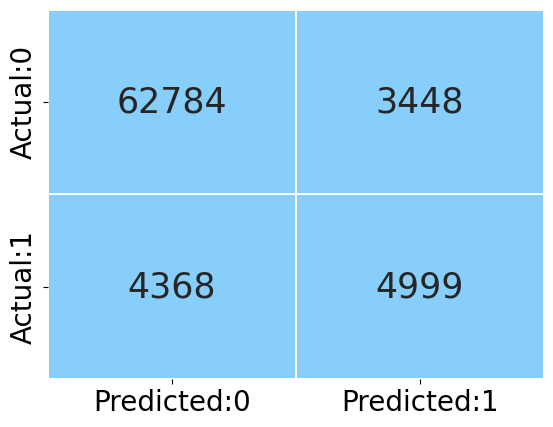

Roc Curve 

None


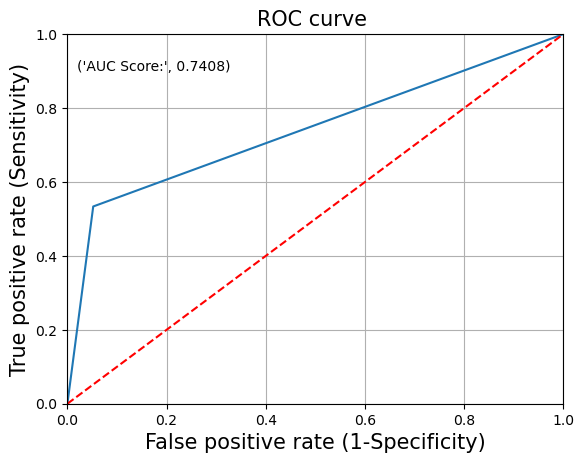

In [2141]:
test_report_st = get_test_report_st(stack)
print(test_report_st)

In [2142]:
stack_xgb_tuned_parameter = pd.DataFrame([{
    'Model_Name': "Stack with XGB and Tuned Parameter",
    'Cohen_kappa_score': 0.503,
    'Accuracy': 0.90,
    'F1_score': 0.56,
    'Precision': 0.59,
    'Recall': 0.53
}])

test_result_table = pd.concat([test_result_table, stack_xgb_tuned_parameter], ignore_index=True)

print(test_result_table.to_string(index=False))


                                    Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                      Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
        Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                 Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
           Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                 Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
           Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                  Ada Boosting           0.000800  0.880000  0.000000   0.560000 0.000000
                             Gradient Boosting

In [2143]:
base_learner = [('DT',DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 9,
                                  max_features = 'sqrt',
                                  min_samples_split = 2,
                                  random_state = 10)) ,
                 ('RF', RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators = 70))]

stack = StackingClassifier(estimators = base_learner, final_estimator = GradientBoostingClassifier())
stack.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=9,
                                                       max_features='sqrt',
                                                       random_state=10)),
                               ('RF',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=70))],
                   final_estimator=GradientBoostingClassifier())

In [2144]:
train_report_st = get_train_report_st(stack)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96    154767
           1       0.69      0.88      0.77     21628

    accuracy                           0.94    176395
   macro avg       0.83      0.91      0.87    176395
weighted avg       0.95      0.94      0.94    176395

cohen_kappa_score: 0.7356353074307604
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.62      0.60      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.78      0.77     75599
weighted avg       0.90      0.90      0.90     75599

cohen_kappa_score: 0.5475940424600596 

Confusion Matrix 



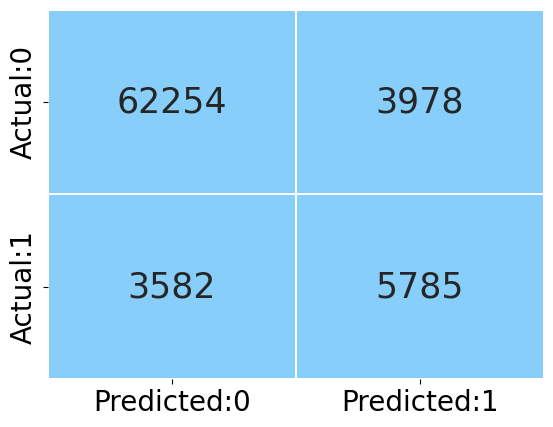

Roc Curve 

None


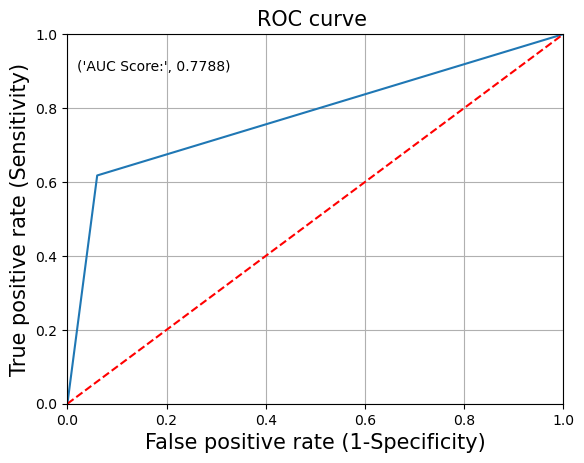

In [2145]:
test_report_st = get_test_report_st(stack)
print(test_report_st)

In [2146]:
stack_gb_tuned_parameter = pd.DataFrame([{
    'Model_Name': "Stack with Gradient Boosting and Tuned Parameter",
    'Cohen_kappa_score': 0.552,
    'Accuracy': 0.90,
    'F1_score': 0.61,
    'Precision': 0.59,
    'Recall': 0.63
}])

test_result_table = pd.concat([test_result_table, stack_gb_tuned_parameter], ignore_index=True)

print(test_result_table.to_string(index=False))


                                      Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                        Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
          Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
  Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                   Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
             Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                   Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
             Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                    Ada Boosting           0.000800  0.880000  0.000000   0.560000 0.000000
                            

In [2147]:
base_learner = [('DT',DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 9,
                                  max_features = 'sqrt',
                                  min_samples_split = 2,
                                  random_state = 10)) ,
                 ('RF', RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators = 70))]

stack = StackingClassifier(estimators = base_learner, final_estimator = AdaBoostClassifier())
stack.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=9,
                                                       max_features='sqrt',
                                                       random_state=10)),
                               ('RF',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=70))],
                   final_estimator=AdaBoostClassifier())

In [2148]:
train_report_st = get_train_report_st(stack)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96    154767
           1       0.70      0.86      0.77     21628

    accuracy                           0.94    176395
   macro avg       0.84      0.90      0.87    176395
weighted avg       0.94      0.94      0.94    176395

cohen_kappa_score: 0.7315288326393603
None


              precision    recall  f1-score   support

           0       0.94      0.94      0.94     66232
           1       0.59      0.59      0.59      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.77      0.77     75599
weighted avg       0.90      0.90      0.90     75599

cohen_kappa_score: 0.5340402193009302 

Confusion Matrix 



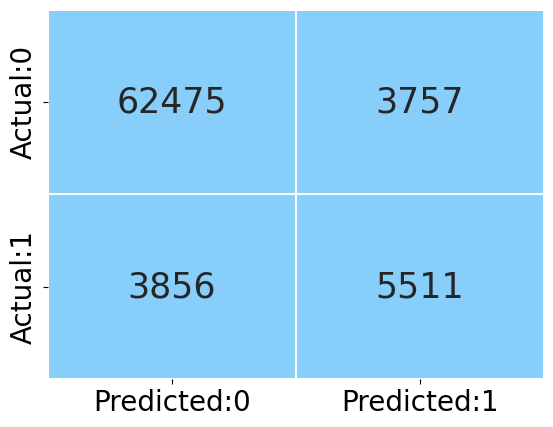

Roc Curve 

None


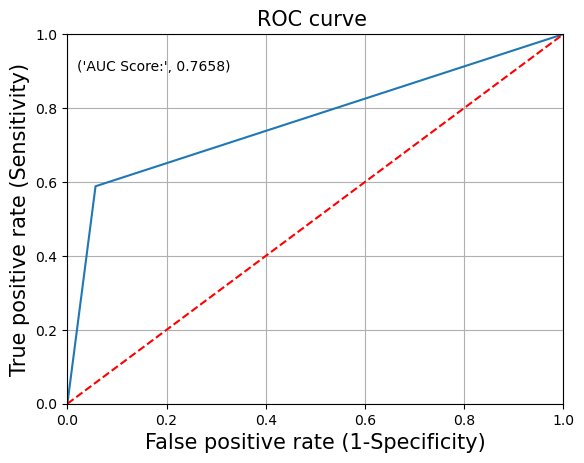

In [2149]:
test_report_st = get_test_report_st(stack)
print(test_report_st)

In [2150]:
stack_ab_tuned_parameter = pd.DataFrame([{
    'Model_Name': "Stack with Ada Boosting and Tuned Parameter",
    'Cohen_kappa_score': 0.547,
    'Accuracy': 0.90,
    'F1_score': 0.60,
    'Precision': 0.59,
    'Recall': 0.62
}])

test_result_table = pd.concat([test_result_table, stack_ab_tuned_parameter], ignore_index=True)

print(test_result_table.to_string(index=False))


                                      Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                        Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
          Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
  Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                   Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
             Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                   Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
             Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                    Ada Boosting           0.000800  0.880000  0.000000   0.560000 0.000000
                            

### stacking with balanced weight and boosting Techniques

In [2152]:
base_learner = [('DT',DecisionTreeClassifier(class_weight='balanced')),
               ('RF', RandomForestClassifier(class_weight='balanced'))]

stack_ada_bal = StackingClassifier(estimators = base_learner, final_estimator = AdaBoostClassifier())
stack_ada_bal.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT',
                                DecisionTreeClassifier(class_weight='balanced')),
                               ('RF',
                                RandomForestClassifier(class_weight='balanced'))],
                   final_estimator=AdaBoostClassifier())

In [2153]:
train_report_st = get_train_report_st(stack_ada_bal)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95    154767
           1       0.60      0.68      0.64     21628

    accuracy                           0.91    176395
   macro avg       0.78      0.81      0.79    176395
weighted avg       0.91      0.91      0.91    176395

cohen_kappa_score: 0.5880011768424287
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.66      0.62      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.80      0.78     75599
weighted avg       0.91      0.90      0.90     75599

cohen_kappa_score: 0.564007852014845 

Confusion Matrix 



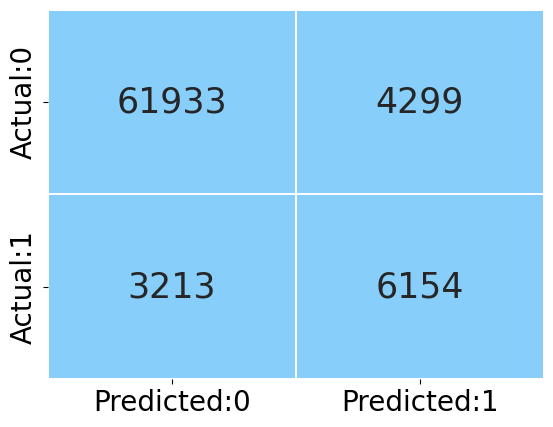

Roc Curve 

None


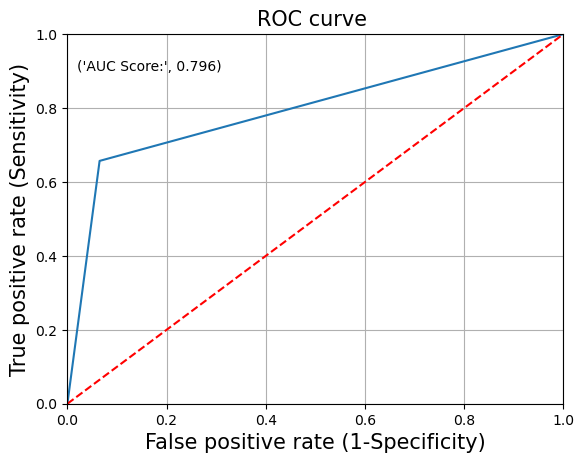

In [2154]:
test_report_st = get_test_report_st(stack_ada_bal)

print(test_report_st)

In [2155]:
stack_ab_bal = pd.DataFrame([{
    'Model_Name': "Stack with Ada Boosting and Balancing",
    'Cohen_kappa_score': 0.564,
    'Accuracy': 0.90,
    'F1_score': 0.62,
    'Precision': 0.59,
    'Recall': 0.66
}])

test_result_table = pd.concat([test_result_table, stack_ab_bal], ignore_index=True)

print(test_result_table.to_string(index=False))


                                      Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                        Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
          Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
  Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                   Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
             Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                   Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
             Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                    Ada Boosting           0.000800  0.880000  0.000000   0.560000 0.000000
                            

In [2157]:
base_learner = [('DT',DecisionTreeClassifier(class_weight='balanced')),
               ('RF', RandomForestClassifier(class_weight='balanced'))]

stack_xgb_bal = StackingClassifier(estimators = base_learner, final_estimator = XGBClassifier())
stack_xgb_bal.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT',
                                DecisionTreeClassifier(class_weight='balanced')),
                               ('RF',
                                RandomForestClassifier(class_weight='balanced'))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eva...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [2158]:
train_report_st = get_train_report_st(stack_xgb_bal)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    154767
           1       0.61      0.61      0.61     21628

    accuracy                           0.90    176395
   macro avg       0.78      0.78      0.78    176395
weighted avg       0.90      0.90      0.90    176395

cohen_kappa_score: 0.5560296057334284
None


              precision    recall  f1-score   support

           0       0.94      0.94      0.94     66232
           1       0.59      0.57      0.58      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.76      0.76     75599
weighted avg       0.90      0.90      0.90     75599

cohen_kappa_score: 0.5223665195591558 

Confusion Matrix 



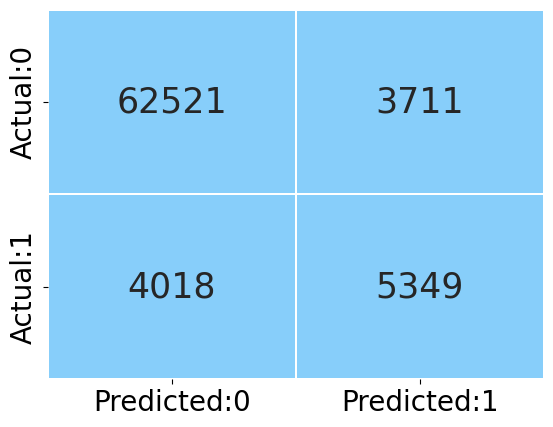

Roc Curve 

None


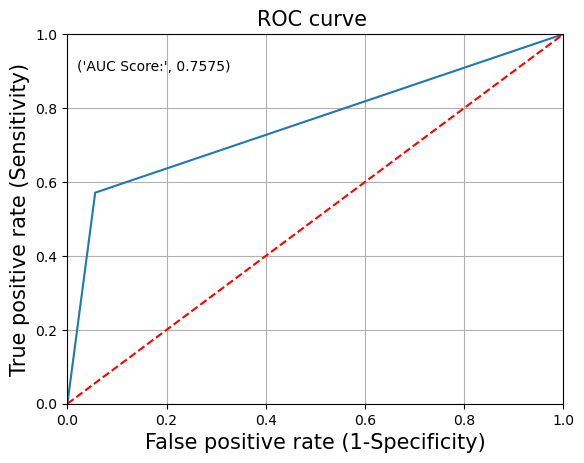

In [2159]:
test_report_st = get_test_report_st(stack_xgb_bal)

print(test_report_st)

In [2160]:
stack_xgb_bal = pd.DataFrame([{
    'Model_Name': "Stack with XG Boosting and Balancing",
    'Cohen_kappa_score': 0.543,
    'Accuracy': 0.90,
    'F1_score': 0.60,
    'Precision': 0.58,
    'Recall': 0.62
}])

test_result_table = pd.concat([test_result_table, stack_xgb_bal], ignore_index=True)

print(test_result_table.to_string(index=False))


                                      Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                        Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
          Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
  Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                   Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
             Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                   Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
             Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                    Ada Boosting           0.000800  0.880000  0.000000   0.560000 0.000000
                            

In [2162]:
base_learner = [('DT',DecisionTreeClassifier(class_weight='balanced')),
               ('RF', RandomForestClassifier(class_weight='balanced'))]

stack_gb_bal = StackingClassifier(estimators = base_learner, final_estimator = GradientBoostingClassifier())
stack_gb_bal_model=stack_gb_bal.fit(x_train_st, y_train_st)

In [2163]:
train_report_st = get_train_report_st(stack_gb_bal)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95    154767
           1       0.60      0.68      0.64     21628

    accuracy                           0.91    176395
   macro avg       0.78      0.81      0.79    176395
weighted avg       0.91      0.91      0.91    176395

cohen_kappa_score: 0.5863255204571393
None


              precision    recall  f1-score   support

           0       0.95      0.93      0.94     66232
           1       0.59      0.66      0.62      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.80      0.78     75599
weighted avg       0.91      0.90      0.90     75599

cohen_kappa_score: 0.5659537720059036 

Confusion Matrix 



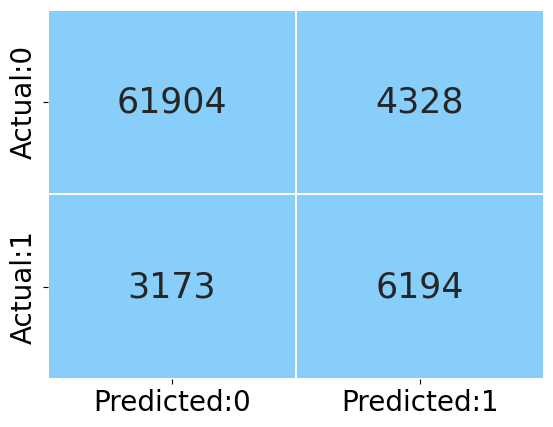

Roc Curve 

None


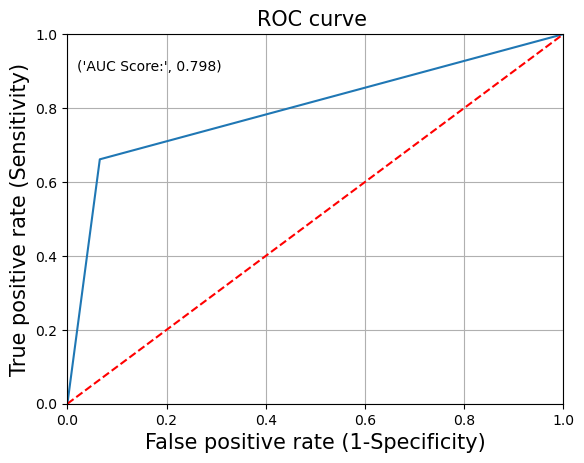

In [2164]:
test_report_st = get_test_report_st(stack_gb_bal)

print(test_report_st)

In [2165]:
stack_gb_bal = pd.DataFrame([{
    'Model_Name': "Stack with Gradient Boosting and Balancing",
    'Cohen_kappa_score': 0.568,
    'Accuracy': 0.90,
    'F1_score': 0.62,
    'Precision': 0.59,
    'Recall': 0.67
}])

test_result_table = pd.concat([test_result_table, stack_gb_bal], ignore_index=True)

print(test_result_table.to_string(index=False))


                                      Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                        Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
          Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
  Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                   Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
             Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                   Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
             Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                    Ada Boosting           0.000800  0.880000  0.000000   0.560000 0.000000
                            

In [2166]:
# stack with gradient boosting with balancing

In [2167]:
base_learner = [('DT',DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 9,
                                  max_features = 'sqrt',
                                  min_samples_split = 2,
                                  class_weight='balanced',
                                  random_state = 10)),
                 ('RF', RandomForestClassifier(criterion = 'entropy', 
                                               class_weight='balanced',
                                               n_estimators = 70))]

stack = StackingClassifier(estimators = base_learner, final_estimator = GradientBoostingClassifier())
stack.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=9,
                                                       max_features='sqrt',
                                                       random_state=10)),
                               ('RF',
                                RandomForestClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       n_estimators=70))],
                   final_estimator=GradientBoostingClassifier())

In [2168]:
train_report_st = get_train_report_st(stack)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95    154767
           1       0.61      0.66      0.64     21628

    accuracy                           0.91    176395
   macro avg       0.78      0.80      0.79    176395
weighted avg       0.91      0.91      0.91    176395

cohen_kappa_score: 0.5835241064804563
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.63      0.61      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.79      0.78     75599
weighted avg       0.90      0.90      0.90     75599

cohen_kappa_score: 0.5549934596853685 

Confusion Matrix 



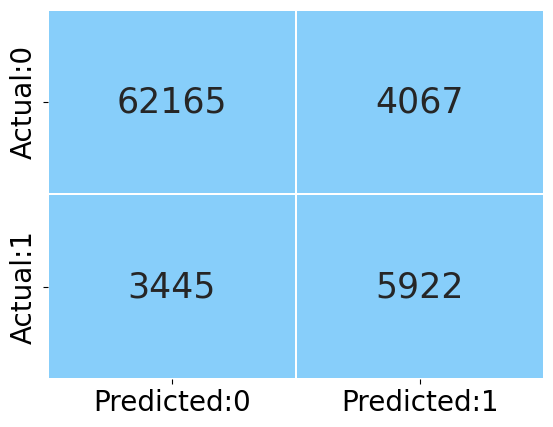

Roc Curve 

None


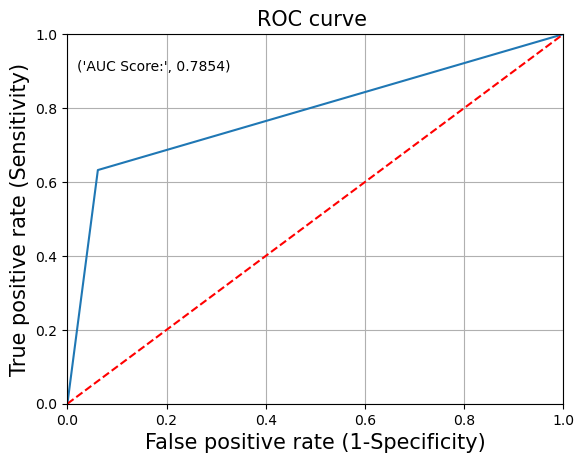

In [2169]:
test_report_st = get_test_report_st(stack)

print(test_report_st)

In [2170]:
stack_gb_bal_tune = pd.DataFrame([{
    'Model_Name': "Stack with Gradient Boosting, Tuned Parameters, and Balancing",
    'Cohen_kappa_score': 0.564,
    'Accuracy': 0.90,
    'F1_score': 0.62,
    'Precision': 0.59,
    'Recall': 0.65
}])

test_result_table = pd.concat([test_result_table, stack_gb_bal_tune], ignore_index=True)

print(test_result_table.to_string(index=False))


                                                   Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision   Recall
                                     Logistic_Regression base           0.000000  0.880000  0.000000   0.000000 0.000000
                       Logistic_Regression with Youdens index           0.029945  0.470000  0.230000   0.140000 0.620000
               Logistic_Regression with Youdens index and rfe           0.028463  0.470000  0.230000   0.140000 0.620000
                                                Decision Tree           0.473000  0.880000  0.540000   0.520000 0.560000
                          Decision Tree with tuned parameters           0.064000  0.880000  0.080000   0.590000 0.040000
                                                Random Forest           0.505000  0.900000  0.560000   0.600000 0.530000
                          Random Forest with tuned parameters           0.508000  0.900000  0.560000   0.610000 0.530000
                                

# Find the model with the highest F1 Score


In [2172]:

best_f1_model = test_result_table.loc[test_result_table['F1_score'].idxmax()]

# Find the model with the highest Cohen’s Kappa Score
best_kappa_model = test_result_table.loc[test_result_table['Cohen_kappa_score'].idxmax()]

print("Best Model based on F1 Score:")
print(best_f1_model)

print("\nBest Model based on Cohen’s Kappa Score:")
print(best_kappa_model)


Best Model based on F1 Score:
Model_Name           Stack with Ada Boosting
Cohen_kappa_score                   0.560000
Accuracy                            0.900000
F1_score                            0.620000
Precision                           0.590000
Recall                              0.650000
Name: 12, dtype: object

Best Model based on Cohen’s Kappa Score:
Model_Name           Stack with Gradient Boosting and Balancing
Cohen_kappa_score                                      0.568000
Accuracy                                               0.900000
F1_score                                               0.620000
Precision                                              0.590000
Recall                                                 0.670000
Name: 19, dtype: object


# Feature importance

In [2174]:
# feature importace with random forest model

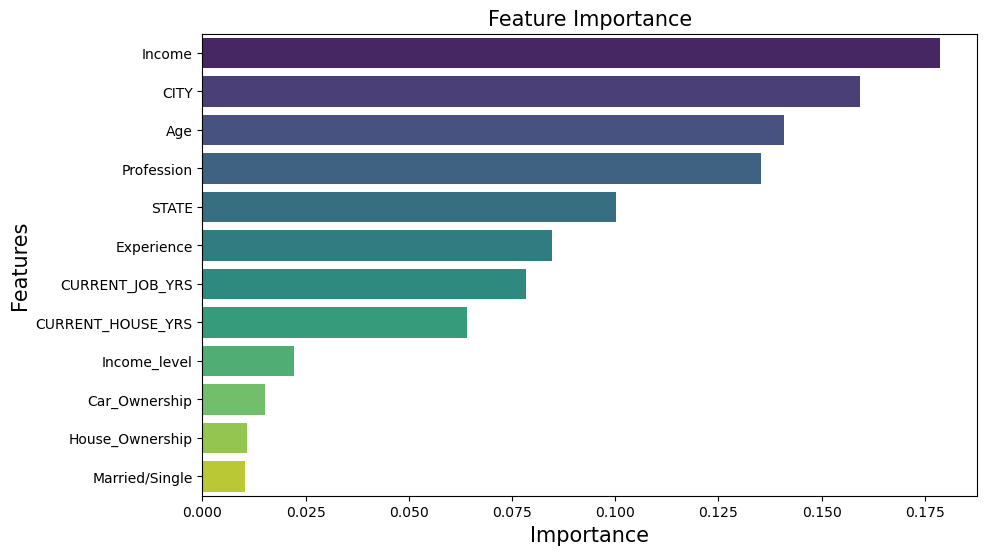

In [2175]:
important_features = pd.DataFrame({'Features': x_train_st.columns, 
                                   'Importance': rf_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Features', data=important_features, palette='viridis')  # Change color palette

plt.title('Feature Importance', fontsize=15)
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)

plt.show()

In [2260]:
import numpy as np
import pandas as pd

sample_tests = scaler.transform(x_test.iloc[:10])  

predictions_proba = stack_ada_boosting_model.predict_proba(sample_tests)

print("\nClass Probabilities for Sample Tests:")
print(predictions_proba)

threshold = 0.4 
predictions = (predictions_proba[:, 1] > threshold).astype(int)

predicted_labels = label_encoder.inverse_transform(predictions)

print("\nModel Predictions for 10 Sample Tests:")
for i, label in enumerate(predicted_labels):
    print(f"Sample {i+1}: {label}")

print("\nClass Distribution in Predictions:", np.bincount(predictions))



Class Probabilities for Sample Tests:
[[0.50204603 0.49795397]
 [0.50127335 0.49872665]
 [0.50127335 0.49872665]
 [0.50204603 0.49795397]
 [0.50204603 0.49795397]
 [0.50127335 0.49872665]
 [0.50204603 0.49795397]
 [0.50127335 0.49872665]
 [0.50204603 0.49795397]
 [0.50127335 0.49872665]]

Model Predictions for 10 Sample Tests:
Sample 1: 1
Sample 2: 1
Sample 3: 1
Sample 4: 1
Sample 5: 1
Sample 6: 1
Sample 7: 1
Sample 8: 1
Sample 9: 1
Sample 10: 1

Class Distribution in Predictions: [ 0 10]
